# **Stock Market Predictions - Amazon Stocks**



## **A. Business Overview**

• Stock price prediction is a challenging but
important task in the financial industry.  
• Traditional stock price prediction methods
have limitations.  
• **Objective**: Develop a stock price prediction
model using Long Short-Term Memory
(LSTM) and Recurrent Neural Networks
(RNN).

**Background**

"In the world of finance, Warren Buffett once wisely stated, 'The stock market is a device for transferring money from the impatient to the patient.' This insightful quote reminds us of the fundamental truth that successful investing often requires a patient and long-term approach. With this perspective in mind, we embark on a journey to predict the future stock prices of one of the world's most iconic companies, Amazon.
While the stock market can be a complex and unpredictable arena in the short term, we aim to harness the potential of machine learning to uncover patterns and trends that may offer valuable insights into Amazon's future performance

**Business** **Problem**

The primary challenge in predicting stock prices, especially in the short term, is the inherent volatility and unpredictability of the stock market. Investors and fund managers often face the problem of making optimal investment decisions. They need accurate forecasts to decide when to buy, sell, or hold Amazon's stock, but the accuracy of predictions can vary widely. Bulls and Bears seek to develop a reliable predictive model that helps investors make informed decisions about their Amazon stock holdings to maximize returns while managing risks. This problem encompasses the need for accurate predictions and the application of these predictions to real-world investment strategies.

## **B. Data Understanding and EDA**

In [115]:
!pip install yfinance
import yfinance as yf

In [116]:
pip install prophet

In [117]:
# Import libraries
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
matplotlib.rcParams['timezone'] = 'UTC'
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from random import gauss as gs
import math
import datetime
import random

from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Flatten,Input
from keras.layers import LSTM,Dense,Dropout,MaxPooling1D,TimeDistributed,Conv1D
from keras.models import load_model
from keras.models import Model

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ARIMA
from statsmodels.tsa.stattools import adfuller

import xgboost as xgb
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

import itertools

In [118]:
amzn = yf.Ticker('STAR')

In [119]:
print(amzn)

yfinance.Ticker object <STAR>


In [120]:
#loading the data and viewing the first five rows
data = yf.download("AMZN",start='2008-01-01')

df = pd.DataFrame(data)
df.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,4.7675,4.8715,4.7350,4.8125,4.8125,277174000
2008-01-03,4.8030,4.8625,4.7260,4.7605,4.7605,182450000
2008-01-04,4.6630,4.6700,4.4250,4.4395,4.4395,205400000
2008-01-07,4.4310,4.5285,4.2735,4.4410,4.4410,199632000
2008-01-08,4.3775,4.5915,4.3465,4.3940,4.3940,245666000


In [121]:
#checking columns in the data frame
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**Data Features**   
The data has the following features:
- **Date**: date of the stock price observation.
- **Open price**: opening price of the stock on the given date.
- **High price**: highest price of the stock on the given date.
- **Low price**: lowest price of the stock on the given date.
- **Close price**: closing price of the stock on the given date.
- **Adjusted Close price**: closing price after adjustments for all applicable splits and dividend distributions
- **Volume**: number of shares of the stock traded on the given date.

**Shape**  
- It has 3,960 rows and 5 columns.

**Data Types**
- All the data is numerical as expected.

**Missing Values**
- There are no missing values.

**Checking for Duplicates**
- There are no duplicates in the data.

**Time Series Comformity**
- The `Date` column is already in `DateTime` format and is the index.

In [122]:
df.shape

(3970, 6)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3970 entries, 2008-01-02 to 2023-10-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3970 non-null   float64
 1   High       3970 non-null   float64
 2   Low        3970 non-null   float64
 3   Close      3970 non-null   float64
 4   Adj Close  3970 non-null   float64
 5   Volume     3970 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 217.1 KB


In [124]:
duplicates = df.duplicated().sum()
duplicates

0

**Summary Statistics**

In [125]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3.970000e+03
mean,54.684198,55.326299,53.981345,54.665559,54.665559,9.927425e+07
std,54.317318,54.965611,53.599254,54.275629,54.275629,6.881817e+07
min,1.764500,1.950000,1.734000,1.751500,1.751500,1.762600e+07
25%,10.051750,10.234625,9.860875,10.065375,10.065375,5.768100e+07
50%,28.048500,28.403750,27.566000,27.974250,27.974250,7.971500e+07
75%,93.223749,94.407503,92.266249,93.314497,93.314497,1.183470e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,1.166116e+09


### **1. Univariate Analysis**

#### **a. Distributon of The Columns using Histplots**

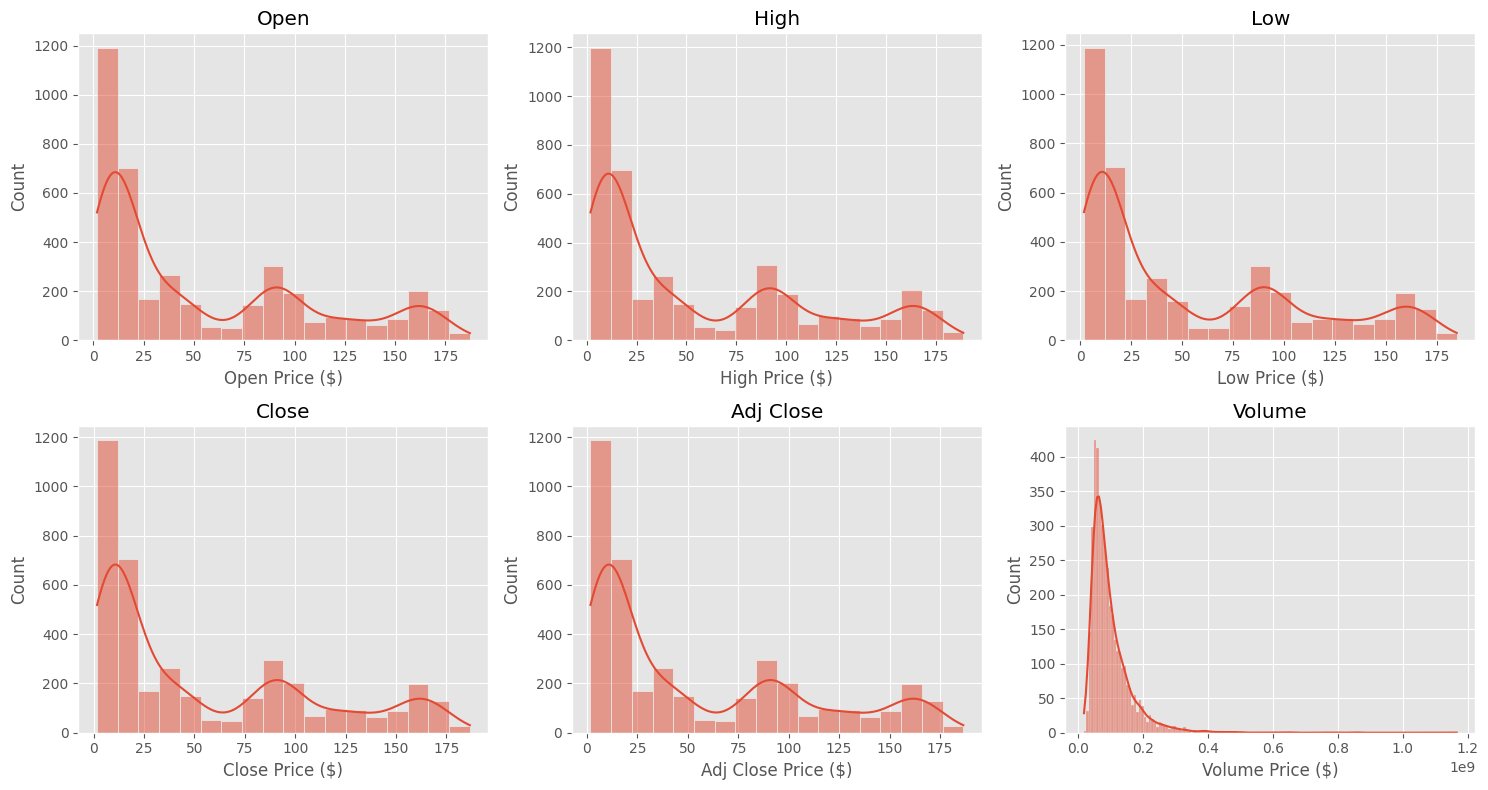

In [126]:
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

plt.figure(figsize=(15, 8))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}')
    plt.xlabel(f'{col} Price ($)')
    plt.grid(True)

plt.tight_layout()

plt.show()

**Observations**
- The **`Open`, `High`, `Low`, `Close`, `Adj Close`** plots have similar distributions throughout the period under review (2008 to 2023).
    - They are trimodal (three peaks).
    - 0-25 dollars is the most frequent price.
- Volume seems to be heavily distributed around 100 million to 200 million.
- All are skewed to the right.
- No outliers are visible from these graphs.

#### **b. Time Series Plots for `Open`, `High`, `Low`, `Close`, and `Adj Close` Columns**
- The plots below visualize the historical price trends over the period under review.

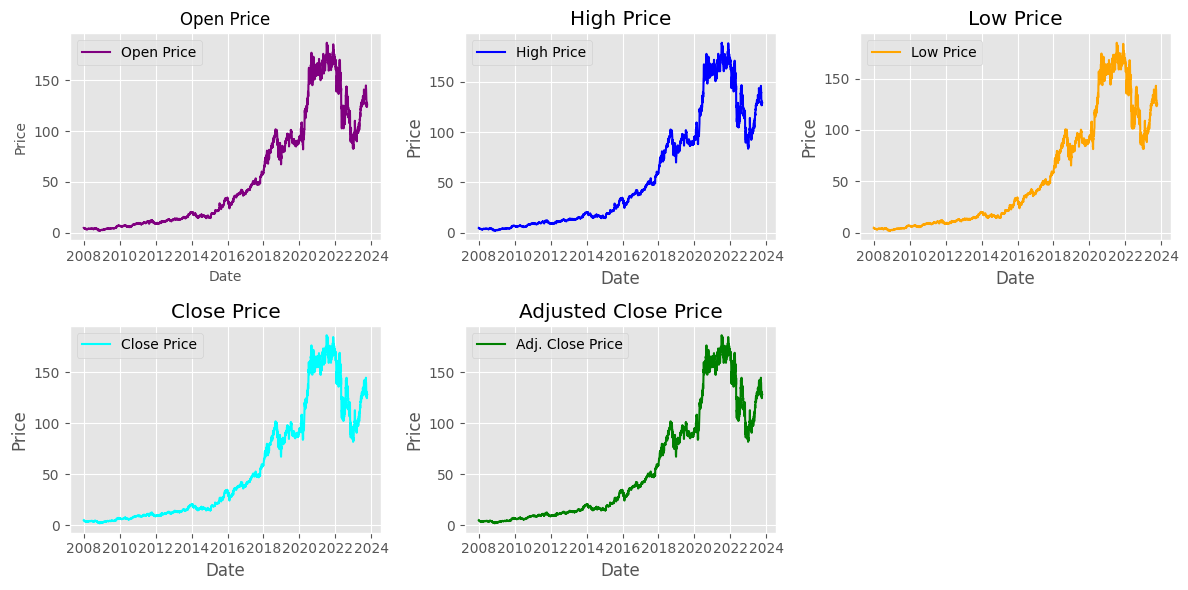

In [127]:
plt.figure(figsize=(12, 6))

# 'Open' price
plt.subplot(2, 3, 1)
plt.plot(df['Open'], label='Open Price', color='purple')
plt.title('Open Price', fontsize=12)
plt.xlabel('Date', fontsize=6)
plt.ylabel('Price', fontsize=6)
plt.legend()

# 'High'price
plt.subplot(2, 3, 2)
plt.plot(df['High'], label='High Price', color='blue')
plt.title('High Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# 'Low' price
plt.subplot(2, 3, 3)
plt.plot(df['Low'], label='Low Price', color='orange')
plt.title('Low Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# 'Close' price
plt.subplot(2, 3, 4)
plt.plot(df['Close'], label='Close Price', color='cyan')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# 'Adj Close' price
plt.subplot(2, 3, 5)
plt.plot(df['Adj Close'], label='Adj. Close Price', color='green')
plt.title('Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout();

**Observations**
- The data seems to have similar seasonality and trend characteristics. This will be confirmed in later sections.

**Time Series Plot for `Volume` Column**

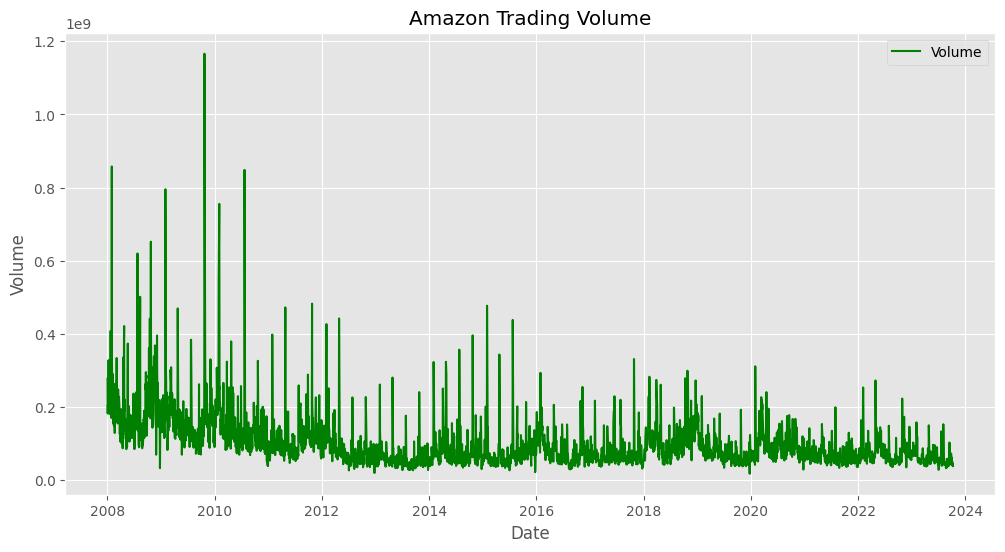

In [128]:
plt.figure(figsize=(12, 6))

plt.subplot()
plt.plot(df['Volume'], label='Volume', color='green')
plt.title('Amazon Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend();

**Observation**
- The Volume column also looks seasonal and with trend.
- The volume decreases as time progresses with large share volumes bought in earlier years (2008 to 2010). This decreases sharply after 2010 and continues to drop to-date. (**why???***)

### **2. Checking for Outliers or Anomalies using Box Plots**

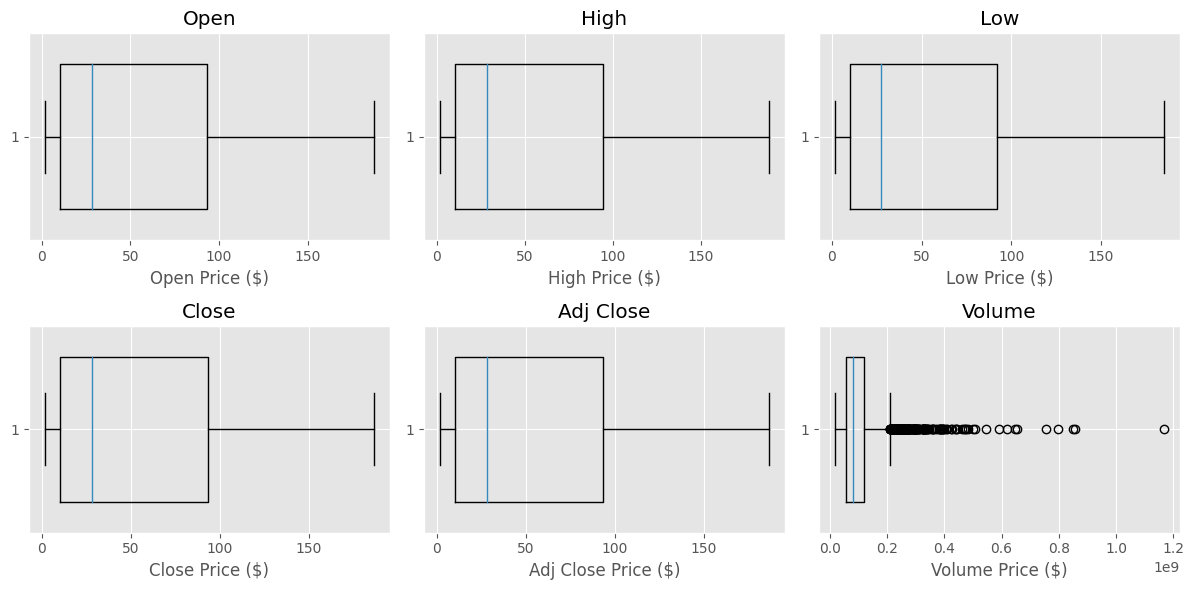

In [129]:
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col], vert=False, widths=0.7)
    plt.title(f'{col}')
    plt.xlabel(f'{col} Price ($)')
    plt.grid(True)

plt.tight_layout()

plt.show()

**Observations**
- The price is centered at approximately 10 and 90 dollars for all columns.
- In all features except `Volume`, there are no outliers detected.

### **3. Bivariate and Multivariate Analysis**

#### **a. Pairplots and Heatmap to Show Correlation**

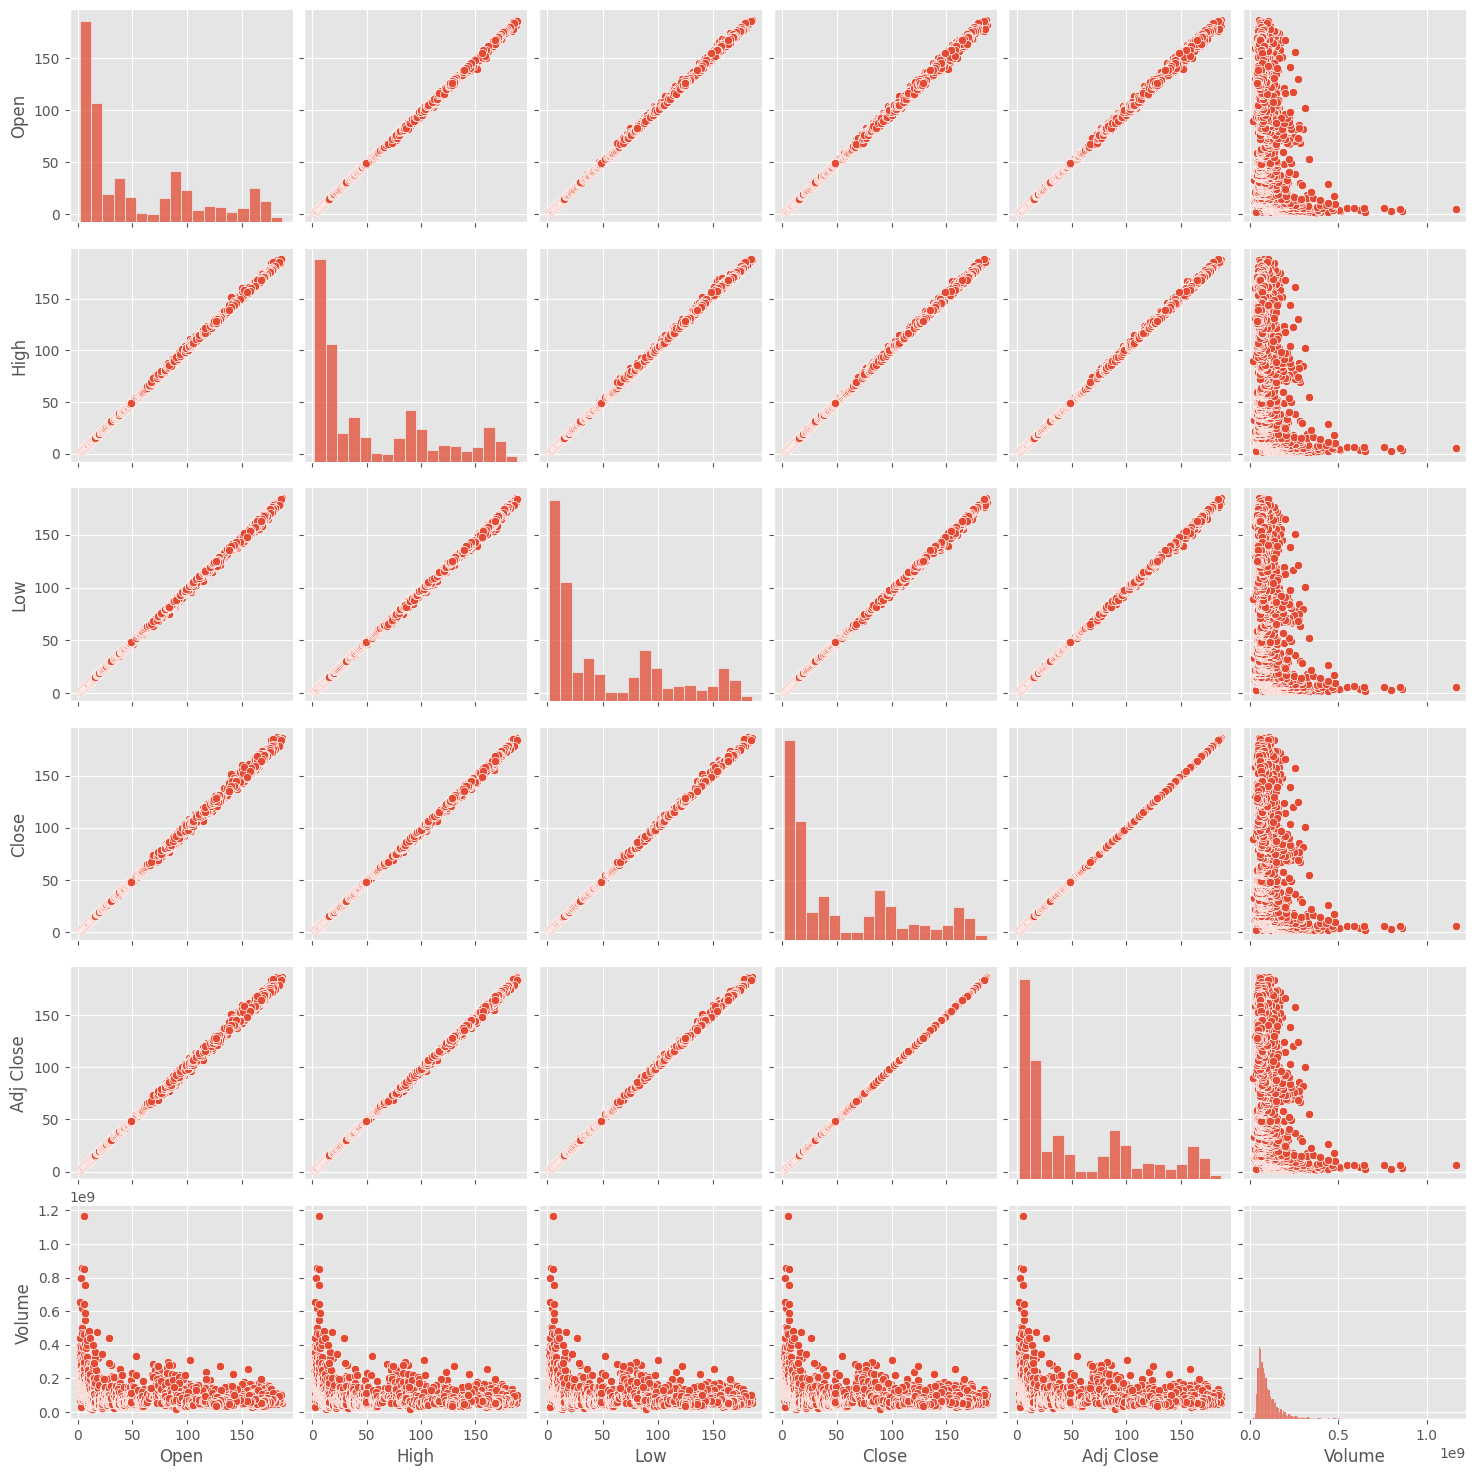

In [130]:
sns.pairplot(df[columns_to_plot])
plt.show()

**Observations**
- The relationship among the variables is similar across the data.
- There is a linear relationship and very strong positive correlation among all features except with 'Volume'.
- There is a non-linear relationship and weak negative correlation with `Volume`.
- These observations are confirmed in the correlation heatmap below.

#### **b. Correlation Heatmap**

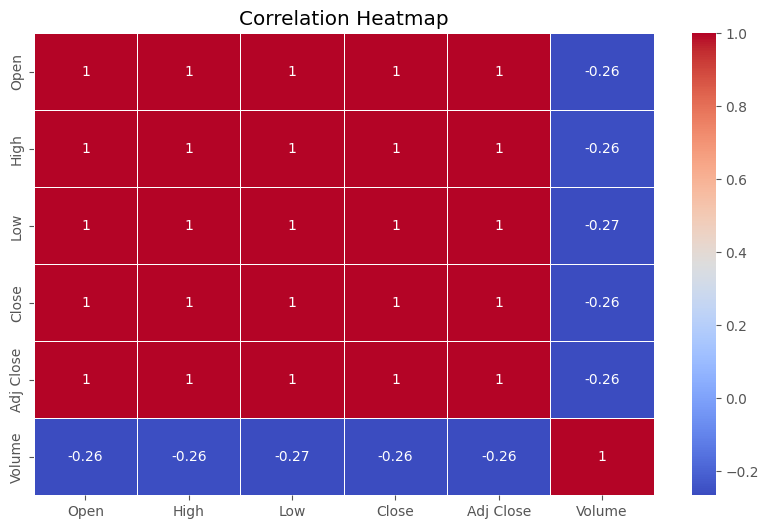

In [131]:
correlation_matrix = df[columns_to_plot].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Observations**  
**External factors** that may have caused the positive correlations can be explained as follows:
1. Amazon stock price is driven by the overall performance of the company. When the company is performing well, its stock price tends to go up.
2. It is correlated with the overall performance of the stock market. When the stock market is doing well, Amazon's stock price tends to go up. This is because investors are more likely to buy risky assets, such as stocks, when the market is doing well.

For the weak negative correlation with `Volume`:
1. The volume of trading in Amazon stock is higher when the stock price is volatile. This is because investors are more likely to trade stocks when they are experiencing large price swings.
2. Volume of trading in Amazon stock is higher when there is a lot of news about the company. This is because investors may be more likely to buy or sell shares of the company based on news about its performance, products, or competitive landscape.

The state of the economy, interest rates, inflation and overall market sentiment are the general external factors that may have influenced the patterns visualized above.

**Observations**
- The time series is seasonal. The price gradually increases as the years go with a sharp rise noted between 2018 and 2022.
- However, there is a decrease towards the year 2023.
- Another increase begins as 2023 comes to an end.

## **C. Data Preparation**

In [132]:
main_data = df.copy()
main_data.shape

(3970, 6)

### **1. Feature Engineering**

#### **a. Date-related Features**
- Additional information from the date column will be extracted capture any potential patterns or seasonality in the stock prices:
    - **`day_of_week`**
    - **`month`**
    - **`year`**


In [133]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3970 entries, 2008-01-02 to 2023-10-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3970 non-null   float64
 1   High       3970 non-null   float64
 2   Low        3970 non-null   float64
 3   Close      3970 non-null   float64
 4   Adj Close  3970 non-null   float64
 5   Volume     3970 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 217.1 KB


In [134]:
# new columns day_of_week, month, year
main_data['day_of_week'] = main_data.index.dayofweek
main_data['month'] = main_data.index.month
main_data['year'] = main_data.index.year

In [135]:
# Slice the DataFrame to include only data from the year 2016
main_data = main_data[(main_data['year'] >= 2016) & (main_data.index <= '2023-10-06')]
main_data

,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,year
Date,,,,,,,,,
2016-01-04,32.814499,32.886002,31.375500,31.849501,31.849501,186290000,0,1,2016
2016-01-05,32.342999,32.345501,31.382500,31.689501,31.689501,116452000,1,1,2016
2016-01-06,31.100000,31.989500,31.015499,31.632500,31.632500,106584000,2,1,2016
2016-01-07,31.090000,31.500000,30.260500,30.396999,30.396999,141498000,3,1,2016
2016-01-08,30.983000,31.207001,30.299999,30.352501,30.352501,110258000,4,1,2016
...,...,...,...,...,...,...,...,...,...
2023-10-02,127.279999,130.470001,126.540001,129.460007,129.460007,48029700,0,10,2023
2023-10-03,128.059998,128.520004,124.250000,124.720001,124.720001,51565000,1,10,2023
2023-10-04,126.059998,127.360001,125.680000,127.000000,127.000000,44203900,2,10,2023


In [136]:
main_data.shape

(1954, 9)

#### **b. Returns**

- A new column `**Returns**` is added to calculate the difference in price for two consecutive days.
- As seen in the plot, the series is seasonal as the period progresses.

In [137]:
# difference in two consecutive days
main_data['Returns'] = main_data['Adj Close'].shift(1) - main_data['Adj Close']
main_data['Returns']

Date
2016-01-04         NaN
2016-01-05    0.160000
2016-01-06    0.057001
2016-01-07    1.235500
2016-01-08    0.044498
                ...   
2023-10-02   -2.340004
2023-10-03    4.740005
2023-10-04   -2.279999
2023-10-05    1.040001
2023-10-06   -2.000000
Name: Returns, Length: 1954, dtype: float64

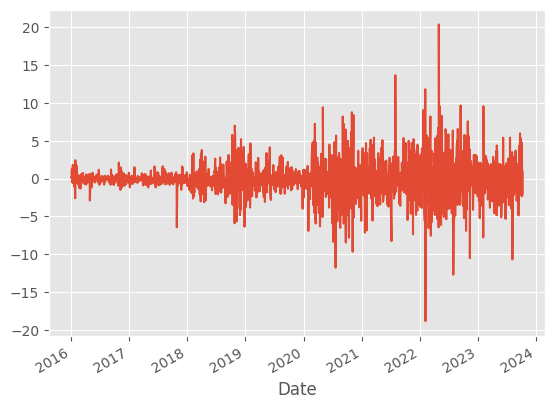

In [138]:
main_data['Returns'].plot();

#### **c. Lag Features for `Adj Close` price**

- Creating lag features will capture the historical behavior of the stock prices.
- Lag features for the adjusted closing price have been calculated in the code below.


In [139]:
# Calculate lag features
num_lags = 3  # Number of lag features
for i in range(1, num_lags + 1):
    main_data[f'Adj_Close_Lag_{i}'] = main_data['Adj Close'].shift(i)

In [140]:
# columns have been successfully created
print(main_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'day_of_week',
       'month', 'year', 'Returns', 'Adj_Close_Lag_1', 'Adj_Close_Lag_2',
       'Adj_Close_Lag_3'],
      dtype='object')


In [141]:
# viewing entire df
main_data

,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,year,Returns,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3
Date,,,,,,,,,,,,,
2016-01-04,32.814499,32.886002,31.375500,31.849501,31.849501,186290000,0,1,2016,NaN,NaN,NaN,NaN
2016-01-05,32.342999,32.345501,31.382500,31.689501,31.689501,116452000,1,1,2016,0.160000,31.849501,NaN,NaN
2016-01-06,31.100000,31.989500,31.015499,31.632500,31.632500,106584000,2,1,2016,0.057001,31.689501,31.849501,NaN
2016-01-07,31.090000,31.500000,30.260500,30.396999,30.396999,141498000,3,1,2016,1.235500,31.632500,31.689501,31.849501
2016-01-08,30.983000,31.207001,30.299999,30.352501,30.352501,110258000,4,1,2016,0.044498,30.396999,31.632500,31.689501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,127.279999,130.470001,126.540001,129.460007,129.460007,48029700,0,10,2023,-2.340004,127.120003,125.980003,125.980003
2023-10-03,128.059998,128.520004,124.250000,124.720001,124.720001,51565000,1,10,2023,4.740005,129.460007,127.120003,125.980003
2023-10-04,126.059998,127.360001,125.680000,127.000000,127.000000,44203900,2,10,2023,-2.279999,124.720001,129.460007,127.120003


#### **d. Rolling Mean and Standard Deviation**
- To help capture trends and volatility.

In [142]:
window_size = 7  # Rolling window size
main_data['Rolling_Mean'] = main_data['Adj Close'].rolling(window=window_size).mean()
main_data['Rolling_Std'] = main_data['Adj Close'].rolling(window=window_size).std()

In [143]:
main_data.isnull().sum()


Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
day_of_week        0
month              0
year               0
Returns            1
Adj_Close_Lag_1    1
Adj_Close_Lag_2    2
Adj_Close_Lag_3    3
Rolling_Mean       6
Rolling_Std        6
dtype: int64

In [144]:
main_data = main_data.fillna(method='bfill')

#### **e. Moving Average**
- The 30-day moving average tracks the underlying trend in Amazon's closing stock prices over time, helping to smooth out short-term fluctuations and provide insights into longer-term price movements.

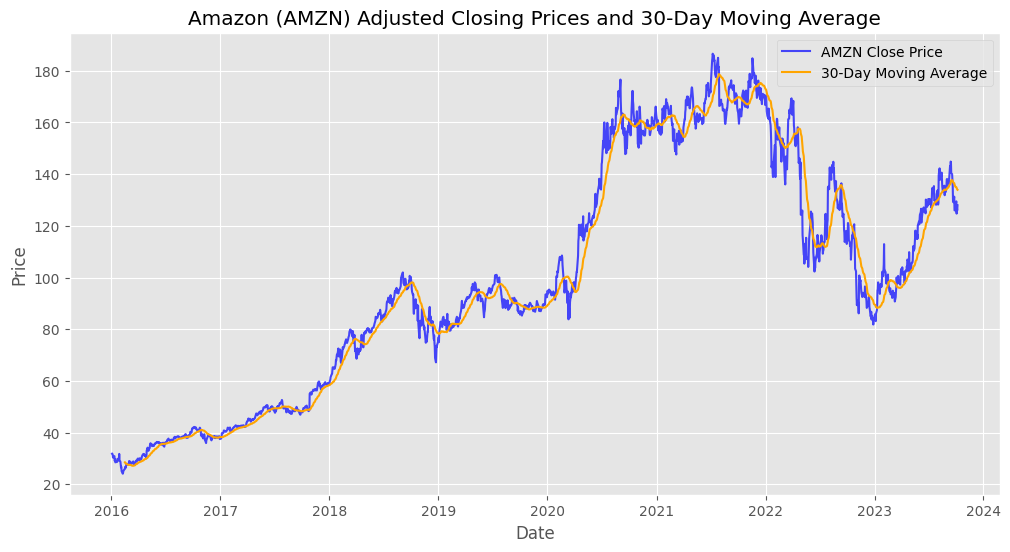

In [145]:
# Calculate 30-day moving average
main_data['30-Day MA'] = main_data['Adj Close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(main_data.index, main_data['Adj Close'], label='AMZN Close Price', color='blue', alpha=0.7)
plt.plot(main_data.index, main_data['30-Day MA'], label='30-Day Moving Average', color='orange')
plt.title('Amazon (AMZN) Adjusted Closing Prices and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#### **f. Exponential Moving Average (EMA) Smoothing Factor**
- EMA can provide more weight to recent data points, which can be useful for capturing short-term trends.
- The small alpha value of 0.2 will result in a smoother EMA and higher sensitivity to recent price changes.

In [146]:
alpha = 0.2
main_data['EMA'] = main_data['Adj Close'].ewm(alpha=alpha).mean()

In [147]:
unique_days_of_week = main_data['day_of_week'].unique()
unique_days_of_week

array([0, 1, 2, 3, 4])

#### **g. Rate of Change (ROC) for `Adj Close`**
- Measures the percentage change in price over a specified period.
- Positive ROC values indicate upward momentum, while negative values indicate downward momentum.
- It  helps traders and analysts identify potential trends or reversals in the price of an asset.

In [148]:
period = 5  # ROC period
main_data['ROC'] = (main_data['Adj Close'] - main_data['Adj Close'].shift(period)) / main_data['Adj Close'].shift(period) * 100

In [149]:
main_data.head()

,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,year,Returns,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3,Rolling_Mean,Rolling_Std,30-Day MA,EMA,ROC
Date,,,,,,,,,,,,,,,,,,
2016-01-04,32.814499,32.886002,31.375500,31.849501,31.849501,186290000,0,1,2016,0.160000,31.849501,31.849501,31.849501,31.100357,0.623616,NaN,31.849501,NaN
2016-01-05,32.342999,32.345501,31.382500,31.689501,31.689501,116452000,1,1,2016,0.160000,31.849501,31.849501,31.849501,31.100357,0.623616,NaN,31.760612,NaN
2016-01-06,31.100000,31.989500,31.015499,31.632500,31.632500,106584000,2,1,2016,0.057001,31.689501,31.849501,31.849501,31.100357,0.623616,NaN,31.708107,NaN
2016-01-07,31.090000,31.500000,30.260500,30.396999,30.396999,141498000,3,1,2016,1.235500,31.632500,31.689501,31.849501,31.100357,0.623616,NaN,31.263965,NaN
2016-01-08,30.983000,31.207001,30.299999,30.352501,30.352501,110258000,4,1,2016,0.044498,30.396999,31.632500,31.689501,31.100357,0.623616,NaN,30.992825,NaN


#### **h. Relative Strength Index (RSI)**
- It measures the speed and change of price movements.
- High RSI is normally placed as any value above 75% and a good indicator to sell.  
- Low RSI is between 0 and 25%, a good indicator to buy.

In [150]:
def calculate_rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

main_data['RSI'] = calculate_rsi(main_data['Adj Close'])
main_data

,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,year,Returns,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3,Rolling_Mean,Rolling_Std,30-Day MA,EMA,ROC,RSI
Date,,,,,,,,,,,,,,,,,,,
2016-01-04,32.814499,32.886002,31.375500,31.849501,31.849501,186290000,0,1,2016,0.160000,31.849501,31.849501,31.849501,31.100357,0.623616,NaN,31.849501,NaN,NaN
2016-01-05,32.342999,32.345501,31.382500,31.689501,31.689501,116452000,1,1,2016,0.160000,31.849501,31.849501,31.849501,31.100357,0.623616,NaN,31.760612,NaN,NaN
2016-01-06,31.100000,31.989500,31.015499,31.632500,31.632500,106584000,2,1,2016,0.057001,31.689501,31.849501,31.849501,31.100357,0.623616,NaN,31.708107,NaN,NaN
2016-01-07,31.090000,31.500000,30.260500,30.396999,30.396999,141498000,3,1,2016,1.235500,31.632500,31.689501,31.849501,31.100357,0.623616,NaN,31.263965,NaN,NaN
2016-01-08,30.983000,31.207001,30.299999,30.352501,30.352501,110258000,4,1,2016,0.044498,30.396999,31.632500,31.689501,31.100357,0.623616,NaN,30.992825,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,127.279999,130.470001,126.540001,129.460007,129.460007,48029700,0,10,2023,-2.340004,127.120003,125.980003,125.980003,127.844288,2.118363,134.964667,129.704559,-1.378836,30.558349
2023-10-03,128.059998,128.520004,124.250000,124.720001,124.720001,51565000,1,10,2023,4.740005,129.460007,127.120003,125.980003,127.215718,2.319943,134.632668,128.707648,-1.000160,17.935671
2023-10-04,126.059998,127.360001,125.680000,127.000000,127.000000,44203900,2,10,2023,-2.279999,124.720001,129.460007,127.120003,126.605717,1.488702,134.391001,128.366118,0.809650,23.583797


#### **i. Average True Range (ATR)**
- A volatility indicator.
- It measures the average range between the high and low prices over a specified period.
- It helps traders and analysts assess the level of volatility in the price movements of an asset.

In [151]:
# Calculate
def calculate_atr(data, period=14):
    high_low = data['High'] - data['Low']
    high_close = abs(data['High'] - data['Adj Close'].shift(1))
    low_close = abs(data['Low'] - data['Adj Close'].shift(1))
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    atr = true_range.rolling(window=period).mean()
    return atr

main_data['ATR'] = calculate_atr(main_data)
main_data

,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,year,Returns,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3,Rolling_Mean,Rolling_Std,30-Day MA,EMA,ROC,RSI,ATR
Date,,,,,,,,,,,,,,,,,,,,
2016-01-04,32.814499,32.886002,31.375500,31.849501,31.849501,186290000,0,1,2016,0.160000,31.849501,31.849501,31.849501,31.100357,0.623616,NaN,31.849501,NaN,NaN,NaN
2016-01-05,32.342999,32.345501,31.382500,31.689501,31.689501,116452000,1,1,2016,0.160000,31.849501,31.849501,31.849501,31.100357,0.623616,NaN,31.760612,NaN,NaN,NaN
2016-01-06,31.100000,31.989500,31.015499,31.632500,31.632500,106584000,2,1,2016,0.057001,31.689501,31.849501,31.849501,31.100357,0.623616,NaN,31.708107,NaN,NaN,NaN
2016-01-07,31.090000,31.500000,30.260500,30.396999,30.396999,141498000,3,1,2016,1.235500,31.632500,31.689501,31.849501,31.100357,0.623616,NaN,31.263965,NaN,NaN,NaN
2016-01-08,30.983000,31.207001,30.299999,30.352501,30.352501,110258000,4,1,2016,0.044498,30.396999,31.632500,31.689501,31.100357,0.623616,NaN,30.992825,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,127.279999,130.470001,126.540001,129.460007,129.460007,48029700,0,10,2023,-2.340004,127.120003,125.980003,125.980003,127.844288,2.118363,134.964667,129.704559,-1.378836,30.558349,3.946428
2023-10-03,128.059998,128.520004,124.250000,124.720001,124.720001,51565000,1,10,2023,4.740005,129.460007,127.120003,125.980003,127.215718,2.319943,134.632668,128.707648,-1.000160,17.935671,4.025000
2023-10-04,126.059998,127.360001,125.680000,127.000000,127.000000,44203900,2,10,2023,-2.279999,124.720001,129.460007,127.120003,126.605717,1.488702,134.391001,128.366118,0.809650,23.583797,4.005714


In [152]:
main_data.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
day_of_week         0
month               0
year                0
Returns             0
Adj_Close_Lag_1     0
Adj_Close_Lag_2     0
Adj_Close_Lag_3     0
Rolling_Mean        0
Rolling_Std         0
30-Day MA          29
EMA                 0
ROC                 5
RSI                13
ATR                13
dtype: int64

In [153]:
mean_30_day_MA = main_data['30-Day MA'].mean()
mean_roc = main_data['ROC'].mean()
mean_rsi = main_data['RSI'].mean()
mean_atr = main_data['ATR'].mean()

main_data['ROC'].fillna(mean_roc, inplace=True)
main_data['30-Day MA'].fillna(mean_30_day_MA, inplace=True)
main_data['ATR'].fillna(mean_atr, inplace=True)
main_data['RSI'].fillna(mean_rsi, inplace=True)

main_data.isnull().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
day_of_week        0
month              0
year               0
Returns            0
Adj_Close_Lag_1    0
Adj_Close_Lag_2    0
Adj_Close_Lag_3    0
Rolling_Mean       0
Rolling_Std        0
30-Day MA          0
EMA                0
ROC                0
RSI                0
ATR                0
dtype: int64

### **2. Seasonality, Stationarity and Trends**


#### **a. Checking for Seasonality**
- First, we will check if there is seasonality and if it is statistically significant for each  column in the time series.
- Remove seasonality using the **`seasonal_decompose`** function.
- Twelve (12) periods are specified to represent a year, the duration of a season in the data.
- After extracting the trend, seasonality and residuals, it plots each of these components in separate subplots.
- It is important to remove seasonality and trend because if they are part of the time series, there will be effects in the forecast value.

Let us look athe **`Adj Close`** plot again

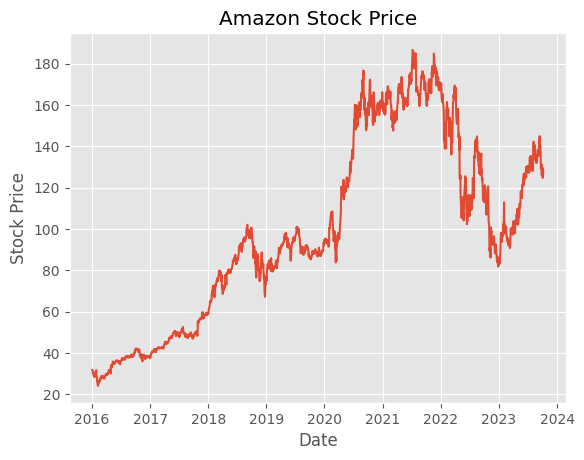

In [154]:
plt.plot(main_data['Adj Close'])

# Set the title and axes labels
plt.title('Amazon Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price');

In [155]:
def check_seasonality(column_name, column_series):
    # Decompose the time series
    decomposition = seasonal_decompose(column_series, model='additive', period=365)

    # Check for seasonality by observing the seasonal component
    if np.std(decomposition.seasonal) > 0.5:
        print(f"Seasonality: {column_name} is Seasonal")
    else:
        print(f"Seasonality: {column_name} is Not Seasonal")

   # Plot the decomposed components
    # plt.figure(figsize=(10, 6))
    # plt.subplot(411)
    # plt.plot(column_series, label='Original')
    # plt.legend(loc='upper left')
    # plt.title(f'{column_name} - Original')
    # plt.subplot(412)
    # plt.plot(decomposition.trend, label='Trend')
    # plt.legend(loc='upper left')
    # plt.title(f'{column_name} - Trend')
    # plt.subplot(413)
    # plt.plot(decomposition.seasonal, label='Seasonal')
    # plt.legend(loc='upper left')
    # plt.title(f'{column_name} - Seasonal')
    # plt.subplot(414)
    # plt.plot(decomposition.resid, label='Residual')
    # plt.legend(loc='upper left')
    # plt.title(f'{column_name} - Residual')
    # plt.tight_layout()
    # plt.show()

In [156]:
# # Checking seasonality in each of the columns
for column in main_data.columns:
    check_seasonality(column, main_data[column])

Seasonality: Open is Seasonal
Seasonality: High is Seasonal
Seasonality: Low is Seasonal
Seasonality: Close is Seasonal
Seasonality: Adj Close is Seasonal
Seasonality: Volume is Seasonal
Seasonality: day_of_week is Seasonal
Seasonality: month is Seasonal
Seasonality: year is Not Seasonal
Seasonality: Returns is Seasonal
Seasonality: Adj_Close_Lag_1 is Seasonal
Seasonality: Adj_Close_Lag_2 is Seasonal
Seasonality: Adj_Close_Lag_3 is Seasonal
Seasonality: Rolling_Mean is Seasonal
Seasonality: Rolling_Std is Seasonal
Seasonality: 30-Day MA is Seasonal
Seasonality: EMA is Seasonal
Seasonality: ROC is Seasonal
Seasonality: RSI is Seasonal
Seasonality: ATR is Not Seasonal


- Several columns are seasonal.
- This needs to be removed. We shall use a function called **`remove_seasonality`**

In [157]:
# Define a function to remove seasonality from a column
def remove_seasonality(column_series):
    # Decompose the time series
    decomposition = seasonal_decompose(column_series, model='additive', period=365)

    # Remove the seasonal component
    seasonality_removed = column_series - decomposition.seasonal

    return seasonality_removed

# Create a new DataFrame to store the seasonality-removed data
seasonality_removed_data = main_data.copy()

# Iterate through columns with seasonality and remove seasonality
columns_with_seasonality = main_data.columns

for column in columns_with_seasonality:
    seasonality_removed_data[column] = remove_seasonality(main_data[column])

In [158]:
# Checking seasonality in each of the columns
for column in main_data.columns:
    check_seasonality(column, seasonality_removed_data[column])

Seasonality: Open is Not Seasonal
Seasonality: High is Not Seasonal
Seasonality: Low is Not Seasonal
Seasonality: Close is Not Seasonal
Seasonality: Adj Close is Not Seasonal
Seasonality: Volume is Not Seasonal
Seasonality: day_of_week is Not Seasonal
Seasonality: month is Not Seasonal
Seasonality: year is Not Seasonal
Seasonality: Returns is Not Seasonal
Seasonality: Adj_Close_Lag_1 is Not Seasonal
Seasonality: Adj_Close_Lag_2 is Not Seasonal
Seasonality: Adj_Close_Lag_3 is Not Seasonal
Seasonality: Rolling_Mean is Not Seasonal
Seasonality: Rolling_Std is Not Seasonal
Seasonality: 30-Day MA is Not Seasonal
Seasonality: EMA is Not Seasonal
Seasonality: ROC is Not Seasonal
Seasonality: RSI is Not Seasonal
Seasonality: ATR is Not Seasonal


Now, **`seasonality_removed_data`** contains the original data with seasonality removed for all columns.

#### **b. Checking for Stationarity**
- The **Augmented Dickey-Fuller (ADF) test** will be used to determine the stationarity of the time series.
- The ADF test helps us assess whether a time series is stationary by comparing it to the null hypothesis that it has a unit root (meaning it's non-stationary).
- The test involves estimating the model's **coefficients**, calculating a **test statistic**, and comparing it to **critical values** to determine whether the null hypothesis can be rejected.
- The **p-value** resulting from the test indicates the strength of evidence against the null hypothesis.
    - If the p-value is less than or equal to the significance level of 0.05, there's evidence to reject the null hypothesis, suggesting the series is stationary.
    - If the p-value is greater than the significance level of 0.05, there's weak evidence to reject the null hypothesis, indicating the series is likely non-stationary.

In [159]:
# Iterate through columns
for column_name in seasonality_removed_data.select_dtypes(include='number'):
    ts = seasonality_removed_data[column_name]

    # Perform the Augmented Dickey-Fuller (ADF) test
    result = sm.tsa.adfuller(ts)

    # Extract and print the p-value from the test result
    p_value = result[1]
    print(f'{column_name} p-value : {p_value}')

    # Interpret the p-value
    if p_value <= 0.05:
        print(f'{column_name} is stationary.')
        print()
    else:
        print(f'{column_name} is non-stationary.')
        print()

Open p-value : 0.5284247826223666
Open is non-stationary.

High p-value : 0.5379446758094453
High is non-stationary.

Low p-value : 0.5266668260485647
Low is non-stationary.

Close p-value : 0.5392807119693683
Close is non-stationary.

Adj Close p-value : 0.5392807119693683
Adj Close is non-stationary.

Volume p-value : 9.790166778432027e-12
Volume is stationary.

day_of_week p-value : 4.092585899768034e-11
day_of_week is stationary.

month p-value : 0.00020816339999722532
month is stationary.

year p-value : 0.9314567490012978
year is non-stationary.

Returns p-value : 1.9510000297084976e-29
Returns is stationary.

Adj_Close_Lag_1 p-value : 0.5064656311149403
Adj_Close_Lag_1 is non-stationary.

Adj_Close_Lag_2 p-value : 0.5123049677074848
Adj_Close_Lag_2 is non-stationary.

Adj_Close_Lag_3 p-value : 0.5023467407101239
Adj_Close_Lag_3 is non-stationary.

Rolling_Mean p-value : 0.530762826051246
Rolling_Mean is non-stationary.

Rolling_Std p-value : 0.03729710676853022
Rolling_Std is st

##### **i. Remove Stationarity Through Differencing**
- Some of the series is stationary:
    - Volume
    - Returns
    - day_of_week
    - ROC
    - RSI
- The rest are non-stationary.

- Next, differencing will be applied to remove stationarity and make the model-building process accurate and reliable.
- The data's statistical properties will remain consistent, allowing for meaningful insights and accurate predictions.

In [160]:
def remove_stationarity_through_differencing(column_series):
    # Apply differencing to make the data more stationary
    differenced_series = column_series.diff().dropna()

    # Plot original and differenced time series
    # plt.figure(figsize=(10, 5))
    # plt.plot(column_series, label='Original')
    # plt.plot(differenced_series, label='Differenced')
    # plt.legend()
    # plt.title(f"{column_series.name} - Differenced vs. Original")
    # plt.show()

# iterate through the columns
for column in seasonality_removed_data.columns:
    remove_stationarity_through_differencing(seasonality_removed_data[column])
    # Check if the differenced training data is stationary
    if p_value < 0.05:
      print(f'The {column} differenced data is stationary (d=1).')
    else:
      print(f'The {column} differenced data is still non-stationary and may require further differencing.')

The Open differenced data is still non-stationary and may require further differencing.
The High differenced data is still non-stationary and may require further differencing.
The Low differenced data is still non-stationary and may require further differencing.
The Close differenced data is still non-stationary and may require further differencing.
The Adj Close differenced data is still non-stationary and may require further differencing.
The Volume differenced data is still non-stationary and may require further differencing.
The day_of_week differenced data is still non-stationary and may require further differencing.
The month differenced data is still non-stationary and may require further differencing.
The year differenced data is still non-stationary and may require further differencing.
The Returns differenced data is still non-stationary and may require further differencing.
The Adj_Close_Lag_1 differenced data is still non-stationary and may require further differencing.
The

##### **ii. Further Differencing to Make the Data Stationary**
*  Further differencing and checks with Augmented Dickley-Fuller Test will be done to make the data stationary.



In [161]:
# Perform differencing along a specific axis
# Perform differencing along the rows (axis=0)
main_data_diff = np.diff(seasonality_removed_data, axis=0)

# Perform Augmented Dickey-Fuller test on the differenced data
result = sm.tsa.adfuller(main_data_diff.ravel())  # Flatten the differenced data for the ADF test
p_value = result[1]

print("ADF p-value (main_data_diff):", p_value)

# Check if the differenced data is now stationary
if p_value < 0.05:
    print("The differenced data is stationary (d=1).")
else:
    print("The differenced data is still non-stationary and may require further differencing.")

ADF p-value (main_data_diff): 0.0
The differenced data is stationary (d=1).


**Observations**
- The differencing was successful in removing stationarity.

### **3. Scaling**

In [162]:
main_data.head()

,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,year,Returns,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3,Rolling_Mean,Rolling_Std,30-Day MA,EMA,ROC,RSI,ATR
Date,,,,,,,,,,,,,,,,,,,,
2016-01-04,32.814499,32.886002,31.375500,31.849501,31.849501,186290000,0,1,2016,0.160000,31.849501,31.849501,31.849501,31.100357,0.623616,99.540635,31.849501,0.466354,54.861701,2.698086
2016-01-05,32.342999,32.345501,31.382500,31.689501,31.689501,116452000,1,1,2016,0.160000,31.849501,31.849501,31.849501,31.100357,0.623616,99.540635,31.760612,0.466354,54.861701,2.698086
2016-01-06,31.100000,31.989500,31.015499,31.632500,31.632500,106584000,2,1,2016,0.057001,31.689501,31.849501,31.849501,31.100357,0.623616,99.540635,31.708107,0.466354,54.861701,2.698086
2016-01-07,31.090000,31.500000,30.260500,30.396999,30.396999,141498000,3,1,2016,1.235500,31.632500,31.689501,31.849501,31.100357,0.623616,99.540635,31.263965,0.466354,54.861701,2.698086
2016-01-08,30.983000,31.207001,30.299999,30.352501,30.352501,110258000,4,1,2016,0.044498,30.396999,31.632500,31.689501,31.100357,0.623616,99.540635,30.992825,0.466354,54.861701,2.698086


In [163]:
# print(main_data.columns)

In [164]:
# main_data_diff_df = pd.DataFrame(main_data_diff)
# main_data_diff_df

In [165]:
# # Renaming the columns
# main_data_diff_df.rename(columns={
#     '0': 'Open',
#     '1': 'High',
#     '2': 'Low',
#     '3': 'Close',
#     '4': 'Adj Close',
#     '5': 'Volume',
#     '6': 'day_of_week',
#     '7': 'month',
#     '8': 'year',
#     '9': 'Returns',
#     '10': 'Adj_Close_Lag_1',
#     '11': 'Adj_Close_Lag_2',
#     '12': 'Adj_Close_Lag_3',
#     '13': 'Rolling_Mean',
#     '14': 'Rolling_Std',
#     '15': '30-Day MA',
#     '16': 'EMA',
#     '17': 'ROC',
#     '18': 'RSI',
#     '19': 'ATR'
# }, inplace=True)

# # Print the DataFrame to verify the column names have been updated
# print(main_data_diff_df)

# #  ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'day_of_week',
# #        'month', 'year', 'Returns', 'Adj_Close_Lag_1', 'Adj_Close_Lag_2',
# #        'Adj_Close_Lag_3']

In [166]:
# import pandas as pd

# # Assuming you have columns 'day_of_week', 'month', and 'year' as integers
# main_data_diff_df['datetime'] = pd.to_datetime(main_data_diff_df[['year', 'month', 'day_of_week']])

# # Drop the 'year', 'month', and 'day_of_week' columns if needed
# main_data_diff_df = main_data_diff_df.drop(['6', '7', '8'], axis=1)

# # Print the DataFrame to verify the changes
# print(main_data_diff_df)


In [167]:
# main_data_diff_df.head()

In [168]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(main_data_diff)

# Save the scaled data
np.save('scaled_data.npy', scaled_data)

In [169]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Sample time series data with date column
# data = {
#     'Date': main_data['date'],
#     'Value': main_data_diff_df.drop(['6', '7', '8'], axis=1)
# }

# # Create a DataFrame
# df = pd.DataFrame(main_data_diff_df)

# # Extract the date column
# dates = main_data['Date']

# # Extract the values to be scaled
# values = main_data_diff_df.drop(['6', '7', '8'].values.reshape(-1, 1))

# # Initialize the Min-Max scaler
# scaler = MinMaxScaler()

# # Scale the values
# scaled_values = scaler.fit_transform(values)

# # Create a new DataFrame with scaled values and the date column
# scaled_df = pd.DataFrame({'Date': dates, 'Scaled_Value': scaled_values.flatten()})

# # Print the scaled DataFrame
# print(scaled_df)

In [170]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Sample time series data with date column
# data = {
#     'Date': main_data_diff_df['datetime'],  # Assuming 'datetime' is the name of your datetime column
#     'Value': main_data_diff_df['Value']  # Assuming 'Value' is the column you want to scale
# }

# # Create a DataFrame
# df = pd.DataFrame(data)  # Use the 'data' dictionary

# # Initialize the Min-Max scaler
# scaler = MinMaxScaler()

# # Scale the 'Value' column
# df['Scaled_Value'] = scaler.fit_transform(df[['Value']])

# # Print the scaled DataFrame
# print(df)


In [171]:
scaled_data.shape

(1953, 20)

In [172]:
main_data_diff.dtype

dtype('float64')

In [173]:
scaled_data.dtype

dtype('float64')

In [174]:
# convert to df
main_data_diff_df = pd.DataFrame(scaled_data, columns=main_data.columns)
main_data_diff_df.head()

,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,year,Returns,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3,Rolling_Mean,Rolling_Std,30-Day MA,EMA,ROC,RSI,ATR
0,0.431953,0.424719,0.503978,0.543504,0.543504,0.176738,0.583111,0.761843,0.238157,0.500956,0.516450,0.549469,0.506217,0.608892,0.581436,0.983012,0.644461,0.411904,0.426493,0.595744
1,0.427464,0.405198,0.531202,0.536907,0.536907,0.454484,0.722328,0.761843,0.238157,0.527626,0.543504,0.516450,0.549469,0.613634,0.512660,0.983073,0.648902,0.473835,0.449317,0.590452
2,0.510061,0.487057,0.482942,0.503381,0.503381,0.655777,0.721948,0.761843,0.238157,0.545968,0.536907,0.543504,0.516450,0.596081,0.518774,0.982917,0.609623,0.551887,0.456892,0.611036
3,0.468688,0.401680,0.498920,0.499775,0.499775,0.390733,0.583111,0.761843,0.238157,0.525588,0.503381,0.536907,0.543504,0.597842,0.510277,0.982016,0.603797,0.442362,0.379432,0.601035
4,0.390251,0.386736,0.456337,0.514937,0.514937,0.425651,0.305439,0.740192,0.238157,0.512804,0.499775,0.503381,0.536907,0.593686,0.494565,0.981374,0.607753,0.342704,0.365815,0.600472


In [175]:
main_data_diff_df['date'] = main_data.index[:-1]

# Print the DataFrame
print(main_data_diff_df)

          Open      High       Low     Close  Adj Close    Volume  \
0     0.431953  0.424719  0.503978  0.543504   0.543504  0.176738   
1     0.427464  0.405198  0.531202  0.536907   0.536907  0.454484   
2     0.510061  0.487057  0.482942  0.503381   0.503381  0.655777   
3     0.468688  0.401680  0.498920  0.499775   0.499775  0.390733   
4     0.390251  0.386736  0.456337  0.514937   0.514937  0.425651   
...        ...       ...       ...       ...        ...       ...   
1948  0.379775  0.378852  0.444517  0.487937   0.487937  0.405140   
1949  0.387053  0.340353  0.360056  0.391562   0.391562  0.481618   
1950  0.440157  0.443143  0.662743  0.678568   0.678568  0.476025   
1951  0.630520  0.529223  0.583816  0.628536   0.628536  0.380420   
1952  0.500798  0.650644  0.618957  0.678993   0.678993  0.419348   

      day_of_week     month      year   Returns  ...  Adj_Close_Lag_2  \
0        0.583111  0.761843  0.238157  0.500956  ...         0.549469   
1        0.722328  0.7618

In [176]:
main_data_diff_df = main_data_diff_df.set_index('date')
main_data_diff_df = main_data_diff_df.drop(['year', 'day_of_week', 'month'], axis=1)
main_data_diff_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3,Rolling_Mean,Rolling_Std,30-Day MA,EMA,ROC,RSI,ATR
date,,,,,,,,,,,,,,,,,
2016-01-04,0.431953,0.424719,0.503978,0.543504,0.543504,0.176738,0.500956,0.516450,0.549469,0.506217,0.608892,0.581436,0.983012,0.644461,0.411904,0.426493,0.595744
2016-01-05,0.427464,0.405198,0.531202,0.536907,0.536907,0.454484,0.527626,0.543504,0.516450,0.549469,0.613634,0.512660,0.983073,0.648902,0.473835,0.449317,0.590452
2016-01-06,0.510061,0.487057,0.482942,0.503381,0.503381,0.655777,0.545968,0.536907,0.543504,0.516450,0.596081,0.518774,0.982917,0.609623,0.551887,0.456892,0.611036
2016-01-07,0.468688,0.401680,0.498920,0.499775,0.499775,0.390733,0.525588,0.503381,0.536907,0.543504,0.597842,0.510277,0.982016,0.603797,0.442362,0.379432,0.601035
2016-01-08,0.390251,0.386736,0.456337,0.514937,0.514937,0.425651,0.512804,0.499775,0.503381,0.536907,0.593686,0.494565,0.981374,0.607753,0.342704,0.365815,0.600472


In [177]:
# saving main_data_diff_df to .csv
main_data_diff_df.to_csv('main_data_diff_df.csv', index=False)

### **4. Performing Train-Test Split**

In [178]:
# Split the DataFrame into x and y variables
X = main_data_diff_df.drop('Adj Close', axis=1)
y = main_data_diff_df['Adj Close']

# Split the x and y variables into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [179]:
X_train.shape

(1562, 16)

In [180]:
y_train.shape

(1562,)

In [181]:
X_test.shape

(391, 16)

## **D. Modelling**

### **1. Baseline Model**



*   The project uses the SARIMA model as the baseline model.




#### **a. Hyperparameters Tuning Using GridSearch CV**




*   Hyperparameter tuning using GridSearch CV is done to find the optimal values of hyperparameters (p,d,q) to be used during modeling


In [182]:
# Identify the column index for the target column
target_column_name = 'Adj Close'
column_names = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Returns', 'Adj_Close_Lag_1', 'Adj_Close_Lag_2', 'Adj_Close_Lag_3',
       'Rolling_Mean', 'Rolling_Std', '30-Day MA', 'EMA', 'ROC', 'RSI', 'ATR']
# Find the index of the target column name
column_index = np.where(np.in1d(column_names, target_column_name))[0]

# Check if the column name was found
if len(column_index) > 0:
    # The index of 'Adj Close' is in column_index[0]
    print(f"The index of '{target_column_name}' is: {column_index[0]}")
else:
    print(f"'{target_column_name}' not found in the column names.")

The index of 'Adj Close' is: 4


In [183]:
#Define a function that calculates d based on the value of p value from the ADF test
def find_differencing_order(time_series):
    result = adfuller(time_series)
    p_value = result[1]

    if p_value > 0.05:
        d = 1
    else:
        d = 0

    return d

In [184]:
# # Define the hyperparameters to search
p_values = range(0, 3)
d_values = [find_differencing_order(y_train)]
q_values = range(0, 3)
s = 5

best_mse = float("inf")
best_order = (0, 0, 0)

for p in p_values:
    for d in d_values:
        for q in q_values:
            # Create and fit the SARIMAX model
            model = SARIMAX(y_train, order=(p, d, q), seasonal_order=(s, 0, 0, s))
            try:
                model_fit = model.fit(disp=0)
                # Make predictions on the test set
                predictions = model_fit.forecast(steps=len(X_test))
                # Calculate Mean Squared Error (MSE)
                mse = mean_squared_error(y_test, predictions)
                if mse < best_mse:
                    best_mse = mse
                    best_order = (p, d, q)
                    best_seasonal_order = (p, d, q, s)
            except:
                pass

print("Best SARIMAX Order (p, d, q):", best_order)
print("Best SARIMAX Order (p, d, q, s):", best_seasonal_order)
print("Best Mean Squared Error:", best_mse)

Best SARIMAX Order (p, d, q): (2, 0, 2)
Best SARIMAX Order (p, d, q, s): (2, 0, 2, 5)
Best Mean Squared Error: 0.005872860199745769






*   For this project, we focus on the Adjusted Close prices which provides a more accurate representation of the stock values over time. The column of the Adjusted Close is therefore used in modeling.


#### **b. SARIMA**

In [185]:
# Specify the order and seasonal order for the SARIMA model
p = 2  # AutoRegressive (AR) order
d = 0  # Integrated (I) order (for differencing)
q = 2  # Moving Average (MA) order
seasonal_p = 2  # Seasonal AR order
seasonal_d = 0  # Seasonal I order (for seasonal differencing)
seasonal_q = 2  # Seasonal MA order
s = 5  # Seasonal period

# Select the 'Adj Close' column as the endog variable
endog_series = y_train

# Create the SARIMA model
sarima_model = sm.tsa.SARIMAX(endog_series, order=(p, d, q), seasonal_order=(seasonal_p, seasonal_d, seasonal_q, s))

# Fit the SARIMA model to the data
sarima_results = sarima_model.fit()

# Display the model summary
print(sarima_results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Adj Close   No. Observations:                 1562
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 5)   Log Likelihood                1770.502
Date:                           Tue, 10 Oct 2023   AIC                          -3523.004
Time:                                   09:13:25   BIC                          -3474.821
Sample:                                        0   HQIC                         -3505.090
                                          - 1562                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0265      0.041      0.643      0.520      -0.054       0.107
ar.L2          0.9734      0.041     23.640



*   The SARIMAX result shows lower AIC of -3523.004 and BIC of -3474.821 indicating a good performance of the model.
*   The higher Log Likelihood of 1770.502 shows that the model has a better fit on the data used.





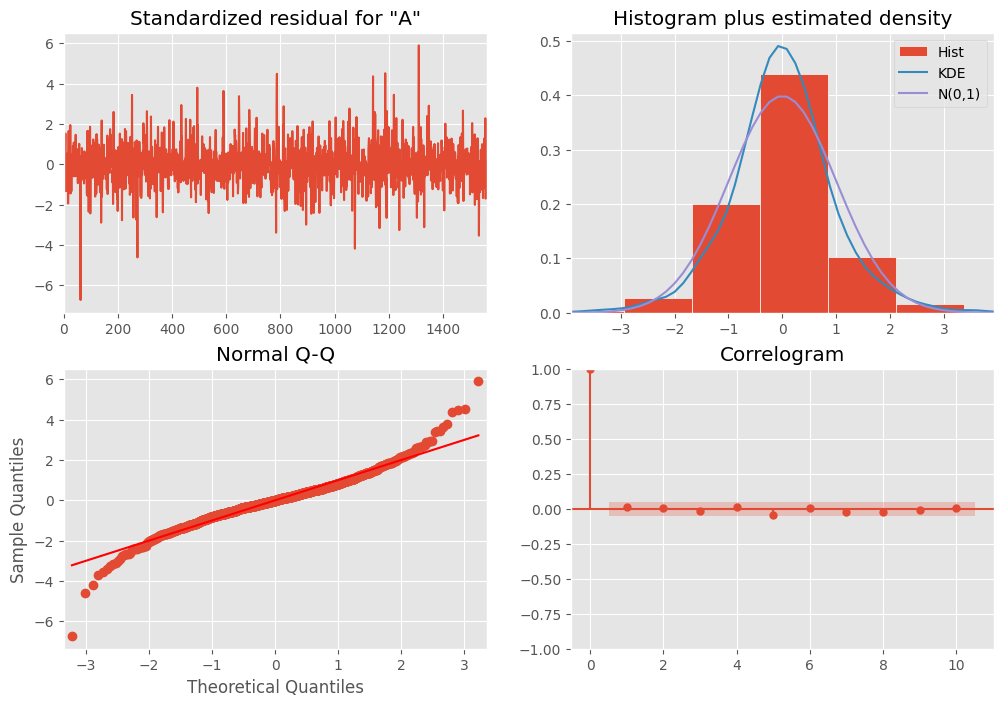

In [186]:
# Display the model diagnostics
sarima_results.plot_diagnostics(figsize=(12, 8))
plt.show()


**Observations**



*   In the Histogram, the blue KDE line follows closely with the N(0,1) line showing a standard notation for a normal distribution with mean of 0 and standard deviation of 1. This indicates that the residuals are normally distributed.


*   The Normal Q-Q plotshows the ordered distribution of Residuals along the linear trend of the sample of a normal distribution with N(0,1) indicating that the residuals are normally distributed.
*   The Correlogram shows that the time series residuals have low correlation with the lagged version of itself.

*   It is concluded that the SARIMAX model provides a good fit that can help in forecasting future values.

##### **i. Prediction on the Training and Test Data**



*   Perform a prediction on both the training dataset and Test dataset to see the the performance of the model on both the Training dataset and Test dataset.


In [187]:
#Defining a function that returns train and test prediction
def train_sarima_and_predict(train_data_scaled, test_data_scaled, p, d, q, seasonal_p, seasonal_d, seasonal_q, s):
    # Fit SARIMA model to the training data
    sarima_model = SARIMAX(train_data_scaled, order=(p, d, q), seasonal_order=(seasonal_p, seasonal_d, seasonal_q, s))
    sarima_results = sarima_model.fit()

    # Predict on the training set
    train_predictions = sarima_results.predict(start=0, end=len(train_data_scaled) - 1)
    #Predict on the test set
    test_predictions = sarima_results.predict(start=len(train_data_scaled), end=len(train_data_scaled) + len(test_data_scaled) - 1)

    return train_predictions, test_predictions

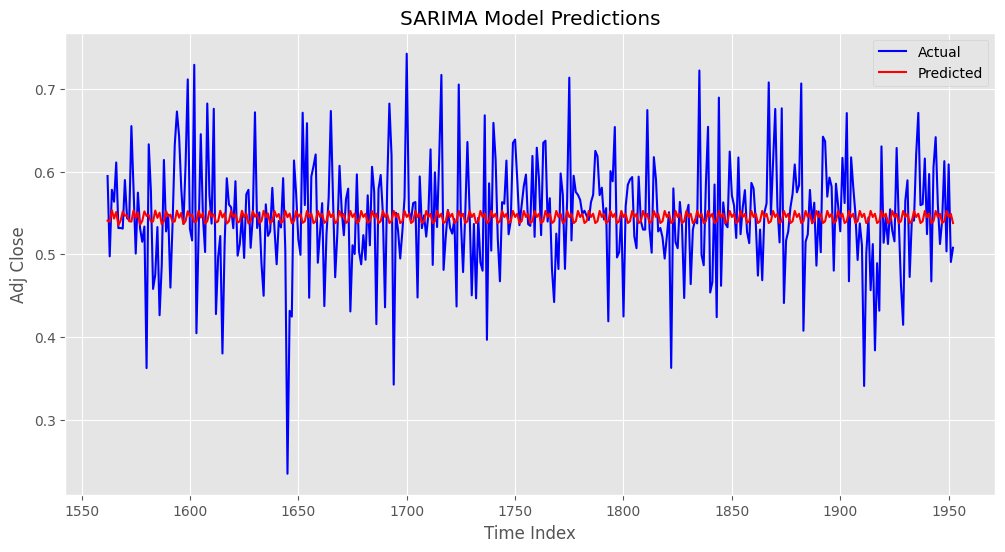

In [201]:
# Specify SARIMA hyperparameters
p = 2
d = 0
q = 2
seasonal_p = 2
seasonal_d = 0
seasonal_q = 2
s = 5  # daily data

# Using 'y_train' as the target variable as a univariate time series
# Fit the SARIMA model
sarima_model = sm.tsa.SARIMAX(y_train, order=(p, d, q), seasonal_order=(seasonal_p, seasonal_d, seasonal_q, s))
sarima_results = sarima_model.fit()

# Make predictions for the training and test sets
train_predictions = sarima_results.predict(start=0, end=len(y_train) - 1, dynamic=False)
test_predictions = sarima_results.predict(start=len(y_train), end=len(y_train) + len(X_test) - 1, dynamic=False)

# Plot the actual and predicted values for the test set
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train), len(y_train) + len(X_test)), y_test, label='Actual', color='blue')
plt.plot(np.arange(len(y_train), len(y_train) + len(X_test)), test_predictions, label='Predicted', color='red')
plt.title('SARIMA Model Predictions')
plt.xlabel('Time Index')
plt.ylabel('Adj Close')
plt.legend()
plt.grid(True)
plt.show()

*   The predictions model has a better prediction on both the training and test datasets indicating a better performance of the SARIMAX model in making predictions.


In [189]:
test_predictions

date
2023-06-01    0.538356
2016-01-19    0.517339
2022-08-01    0.545309
2022-02-01    0.563070
2017-02-15    0.548921
                ...   
2021-01-20    0.527747
2019-04-16    0.539647
2016-04-04    0.557849
2019-05-23    0.550590
2021-03-29    0.548749
Name: predicted_mean, Length: 391, dtype: float64

In [210]:
y_test.index[0]

Timestamp('2022-06-03 00:00:00')

In [208]:
X_test

,Open,High,Low,Close,Volume,Returns,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3,Rolling_Mean,Rolling_Std,30-Day MA,EMA,ROC,RSI,ATR
date,,,,,,,,,,,,,,,,
2022-06-03,0.511322,0.584056,0.602168,0.594620,0.572801,0.424859,0.450348,0.655015,0.563685,0.785342,0.384574,0.974002,0.755771,0.461277,0.492407,0.649374
2021-08-05,0.508744,0.435368,0.487000,0.497488,0.488705,0.570950,0.567689,0.566421,0.614348,0.515643,0.309003,0.980918,0.608685,0.670297,0.419422,0.555464
2019-11-18,0.609951,0.522120,0.643141,0.577948,0.441516,0.531527,0.590273,0.536622,0.536882,0.648514,0.498580,0.984687,0.699352,0.518635,0.365988,0.564882
2020-03-17,0.438094,0.432257,0.600865,0.563602,0.400568,0.620848,0.707058,0.422871,0.674362,0.628861,0.526423,0.981245,0.681700,0.663654,0.489246,0.585646
2017-03-23,0.553391,0.519473,0.594676,0.611043,0.378894,0.462047,0.521365,0.543566,0.533381,0.619807,0.378554,0.983387,0.682691,0.527441,0.498054,0.511338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-12,0.475038,0.485997,0.557927,0.612644,0.517622,0.493471,0.569100,0.524186,0.545700,0.650017,0.538408,0.983625,0.725497,0.635538,0.624160,0.651783
2019-08-01,0.401643,0.335916,0.447916,0.503538,0.461695,0.519587,0.498334,0.498702,0.499988,0.506619,0.507293,0.980283,0.570598,0.536618,0.377921,0.622650
2022-07-20,0.609015,0.502165,0.614527,0.608740,0.459062,0.554965,0.655474,0.679212,0.567969,0.804985,0.630464,0.983700,0.836238,0.586782,0.587166,0.532182


In [218]:
# Define the start and end dates for your desired date range
start_date = datetime(2023, 10, 7)  # Specify your start date
end_date = datetime(2025, 10, 6)    # Specify your end date

# Generate predictions for the specified date range
date_range = pd.date_range(start=start_date, end=end_date, freq='B')
predictions = sarima_results.predict(start=len(y_train), end=len(y_train) + len(date_range) - 1, dynamic=False)

# Create a DataFrame with the predictions and date range
predictions_df = pd.DataFrame({'Datetime': date_range, 'Predicted_Adj_Close': predictions})

# Save the predictions DataFrame to a CSV file
csv_filename = 'sarima_predictions.csv'
predictions_df.to_csv(csv_filename, index=False)

In [220]:
prediction_df = pd.read_csv('/content/sarima_predictions.csv')
prediction_df

,Datetime,Predicted_Adj_Close
0,2023-10-09,0.540623
1,2023-10-10,0.539334
2,2023-10-11,0.553312
3,2023-10-12,0.543201
4,2023-10-13,0.551204
...,...,...
516,2025-09-30,0.539910
517,2025-10-01,0.552418
518,2025-10-02,0.545061
519,2025-10-03,0.548976


In [205]:
from datetime import datetime, timedelta

last_date = y_test.index[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, len(X_test) + 1)]
future_datetime_index = pd.to_datetime(future_dates)
future_predictions_df = pd.DataFrame({'Datetime': future_datetime_index, 'Predicted_Adj_Close': test_predictions})

future_predictions_df.to_csv('sarima_predictions.csv', index=False)
future_predictions_df

,Datetime,Predicted_Adj_Close
1562,2022-08-30,0.540623
1563,2022-08-31,0.539334
1564,2022-09-01,0.553312
1565,2022-09-02,0.543201
1566,2022-09-03,0.551204
...,...,...
1948,2023-09-20,0.539913
1949,2023-09-21,0.552421
1950,2023-09-22,0.545064
1951,2023-09-23,0.548979


##### **ii. SARIMA Metrics**

In [79]:
# 'y_test' contains the actual values for the test set
actual_values = y_test

# Calculate MSE, MAE, RMSE, MAPE
mae = mean_absolute_error(actual_values, test_predictions)
mse = mean_squared_error(actual_values, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, test_predictions)



y_test = np.array(actual_values)
y_pred = np.array(test_predictions)
z = pd.DataFrame(np.abs((y_test - y_pred)/y_test)).replace(np.inf, np.nan)
MAPE = z.mean() * 100

print('Mean Absolute Error (MAE) for Test Set Forecast:', mae)
print('Mean Squared Error (MSE) for Test Set Forecast:', mse)
print('Root Mean Square Error (RMSE) for Test Set Forecast:', rmse)
print('Mean Absolute Percentage Error:', MAPE)
print('R-squared (R2) Score for Test Set Forecast:', r2)

Mean Absolute Error (MAE) for Test Set Forecast: 0.052256994759892844
Mean Squared Error (MSE) for Test Set Forecast: 0.004882713194294458
Root Mean Square Error (RMSE) for Test Set Forecast: 0.06987641371946944
Mean Absolute Percentage Error: 0    9.996255
dtype: float64
R-squared (R2) Score for Test Set Forecast: -0.044551095137463914




*   The model seems to have relatively low errors: MAE of 0.050555962813470426, MSE of 0.004662935239053981, and RMSE of 0.06828568839115544. This indicate better performance of the model in making predictions

*   The MAPE value of 9.67% suggests that, on average, the model's predictions have around a 9.67% relative error, which is better for the model's performance.


*   The r2-score is 0.002465654505289794 indicating that the accuracy of the model is low.




### **2. FB Prophet**

In [80]:
# reviewing the df to use
main_data_diff_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3,Rolling_Mean,Rolling_Std,30-Day MA,EMA,ROC,RSI,ATR
date,,,,,,,,,,,,,,,,,
2016-01-04,0.431953,0.424719,0.503978,0.543504,0.543504,0.176738,0.500956,0.516450,0.549469,0.506217,0.608892,0.581436,0.983012,0.644461,0.411904,0.426493,0.595744
2016-01-05,0.427464,0.405198,0.531202,0.536907,0.536907,0.454484,0.527626,0.543504,0.516450,0.549469,0.613634,0.512660,0.983073,0.648902,0.473835,0.449317,0.590452
2016-01-06,0.510061,0.487057,0.482942,0.503381,0.503381,0.655777,0.545968,0.536907,0.543504,0.516450,0.596081,0.518774,0.982917,0.609623,0.551887,0.456892,0.611036
2016-01-07,0.468688,0.401680,0.498920,0.499775,0.499775,0.390733,0.525588,0.503381,0.536907,0.543504,0.597842,0.510277,0.982016,0.603797,0.442362,0.379432,0.601035
2016-01-08,0.390251,0.386736,0.456337,0.514937,0.514937,0.425651,0.512804,0.499775,0.503381,0.536907,0.593686,0.494565,0.981374,0.607753,0.342704,0.365815,0.600472


In [81]:
# Create a new DataFrame and rename the column
prophet_df = main_data_diff_df.copy()
prophet_df = pd.DataFrame(prophet_df).reset_index()
prophet_df = prophet_df.rename(columns={'date': 'ds'})

def calculate_rmse(actual, predicted):
    return mean_squared_error(actual, predicted, squared=False)

def calculate_metrics(actual, predicted):
    rmse = calculate_rmse(actual, predicted)
    metrics_df = pd.DataFrame({'RMSE': [rmse]}, index=[actual.name])
    return metrics_df

def prophet_model(column_name):
    new_subset = prophet_df.rename(columns={column_name: 'y'})

    subset_columns = ['ds', 'y']
    prophet_subset = new_subset[subset_columns]

    prophet_subset_reset = prophet_subset.reset_index(drop=True)

    model = Prophet(interval_width=0.95)
    fitted_model = model.fit(prophet_subset_reset)

    future_dates = model.make_future_dataframe(periods=12, freq='MS')
    forecast = model.predict(future_dates)

    # Print and plot the results
    print(f"Results for {column_name}:")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

    # Plot the forecast and components
    model.plot(forecast, uncertainty=True)
    model.plot_components(forecast)
    plt.show()

    actual = prophet_subset['y']
    predicted = forecast['yhat'][-len(actual):]

    fb_metrics_df = calculate_metrics(actual, predicted)

    return actual, predicted, fb_metrics_df

fb_metrics_dfs = []

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaihfu63o/dvf6a61b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaihfu63o/ictkik1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83572', 'data', 'file=/tmp/tmpaihfu63o/dvf6a61b.json', 'init=/tmp/tmpaihfu63o/ictkik1m.json', 'output', 'file=/tmp/tmpaihfu63o/prophet_modelj4_n9rs7/prophet_model-20231010090049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:00:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:00:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Results for Adj Close:
             ds      yhat  yhat_lower  yhat_upper
1960 2024-06-01  0.547989    0.389722    0.702891
1961 2024-07-01  0.563016    0.419965    0.717637
1962 2024-08-01  0.540586    0.395146    0.681920
1963 2024-09-01  0.541443    0.394448    0.695393
1964 2024-10-01  0.537064    0.393470    0.689003


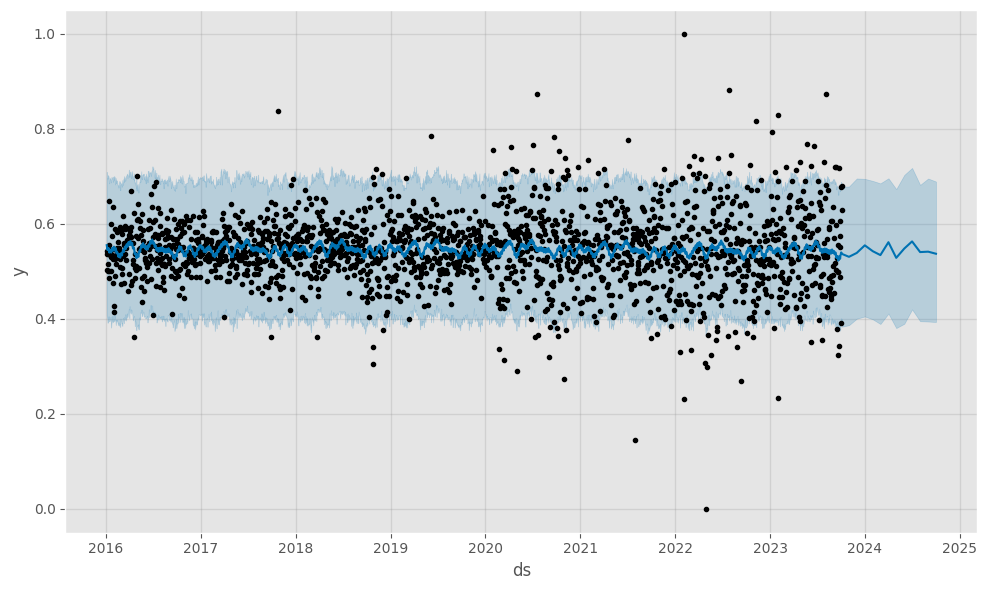

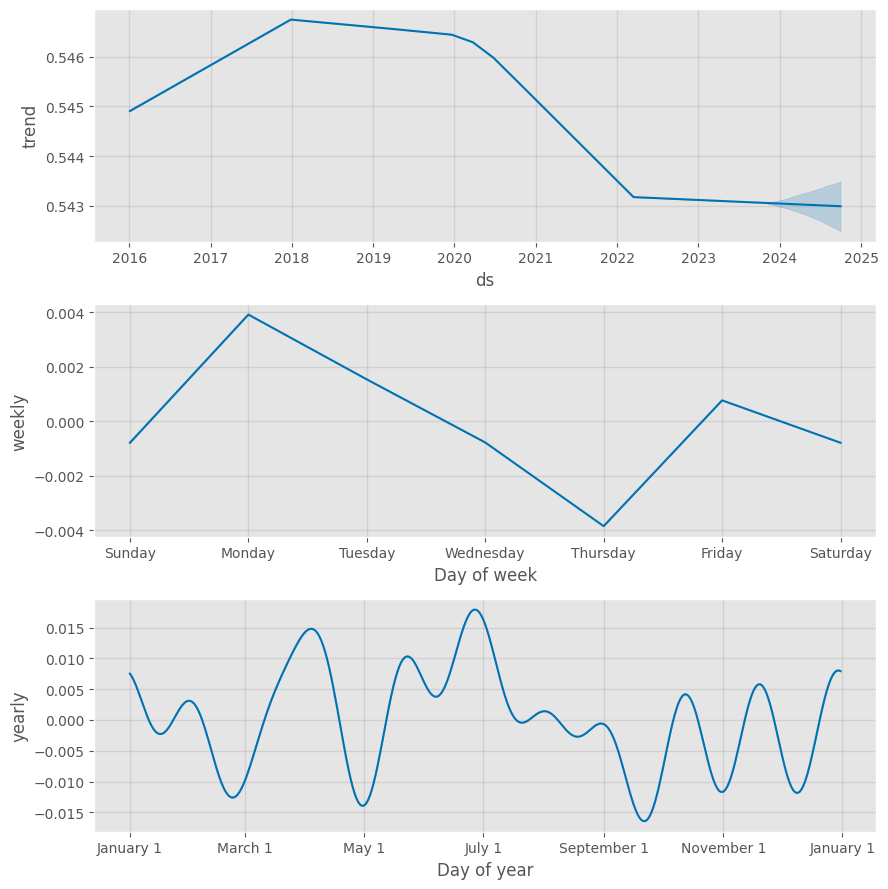

In [82]:
actual, predicted, metrics_df = prophet_model('Adj Close')

# metrics dataframe
metrics_df2 = calculate_metrics(actual, predicted)
fb_metrics_dfs.append(metrics_df2)

##### **i. FB Prophet Metrics**

In [83]:
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

z = pd.DataFrame(np.abs((actual - predicted)/actual)).replace(np.inf, np.nan)
MAPE = z.mean() * 100

print('Mean Absolute Error (MAE): ', mae)
print('Mean Squared Error (MSE): ', mse)
print('Root Mean Square Error (RMSE): ', rmse)
print('Mean Absolute Percentage Error: ', MAPE)
print(f"R-squared (R2) Score for Test Set Forecast: {r2}")

Mean Absolute Error (MAE):  0.0551235440972596
Mean Squared Error (MSE):  0.005779808483820353
Root Mean Square Error (RMSE):  0.07602505168574601
Mean Absolute Percentage Error:  0    10.514122
dtype: float64
R-squared (R2) Score for Test Set Forecast: -0.013788497480081485




*  The model's MAE and MAPE values suggest that, on average, the model's predictions have a moderate error of approximately 7.583 units or 7.705% relative error from the actual values.These lower values indicate good performance of the model.

*   The MSE and RMSE values indicate that the model's predictions have relatively large squared errors, with an RMSE of approximately 10.849, which suggests that the model's errors can be quite significant in magnitude. Therefore, this may not be the best model for making prediction

### **3. XGBOOST - Finding Important Features**

XGBoost's feature importance is used here to provide a ranking of features based on their influence in the model's predictions, aiding in understanding and optimizing feature selection.

Mean Squared Error on Test Set: 0.00028977215858672507

Top 8 Columns:
Close
High
Returns
Rolling_Std
Volume
Open
ROC
RSI


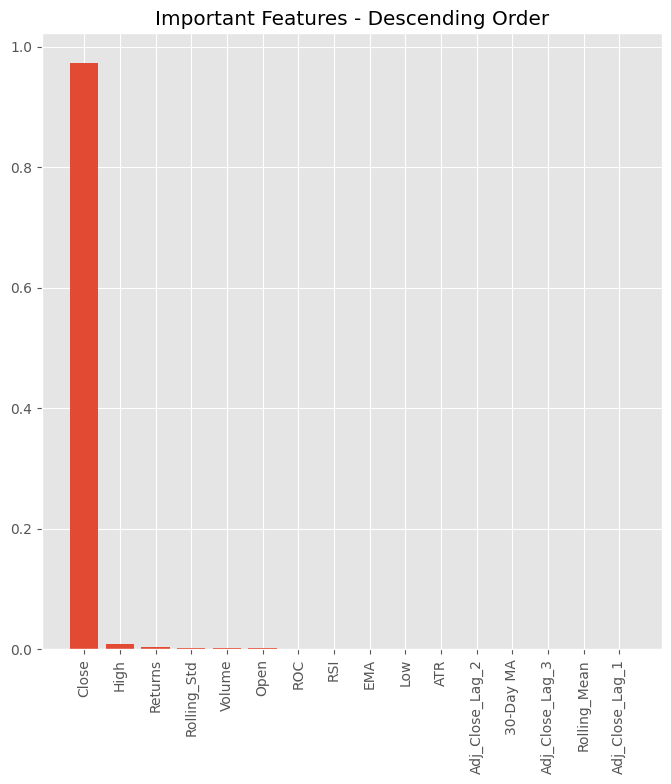

In [84]:
# Function to split the data into training and test sets based on feature importance
def get_feature_importance_data(main_data_diff_df):
    y = main_data_diff_df['Adj Close']# target variable
    X = main_data_diff_df.drop('Adj Close', axis=1)  # Drop the target column

    train_samples = int(X.shape[0] * 0.65) # Calculating the number of training samples (65% of the total samples)


    # Splitting the dataset into training and test sets
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]

    return (X_train, y_train), (X_test, y_test)

# Using the function
(X_train, y_train), (X_test, y_test) = get_feature_importance_data(main_data_diff_df)

# Define and train the regressor
regressor = xgb.XGBRegressor(gamma=0.0, n_estimators=200, base_score=0.7, colsample_bytree=1, learning_rate=0.05)
regressor.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")
print()

# Sort the feature importance in descending order
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]

# Print the top 8 columns
print('Top 8 Columns:')
for i in range(8):
    print(X_test.columns[sorted_indices[i]])

# Plot the feature importance in descending order
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(regressor.feature_importances_))], regressor.feature_importances_[sorted_indices].tolist(), tick_label=X_test.columns[sorted_indices])
plt.title('Important Features - Descending Order')
plt.show()

The model identified the top eight features as being crucial to its predictions. Among these, the primary stock metrics 'Close', 'High', 'Low', and 'Open' were especially influential. In addition, calculated attributes like past adjusted close values and the rolling mean were also deemed significant.

### **3. RNN**

A Simple Recurrent Neural Network (RNN) is a foundational deep learning architecture designed for processing sequential data. By maintaining a memory of previous inputs, RNNs are particularly suited for tasks like time series analysis. In this section, we'll explore the basic structure and application of a Simple RNN

In [85]:
main_data_diff_df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Adj_Close_Lag_1,Adj_Close_Lag_2,Adj_Close_Lag_3,Rolling_Mean,Rolling_Std,30-Day MA,EMA,ROC,RSI,ATR
date,,,,,,,,,,,,,,,,,
2016-01-04,0.431953,0.424719,0.503978,0.543504,0.543504,0.176738,0.500956,0.516450,0.549469,0.506217,0.608892,0.581436,0.983012,0.644461,0.411904,0.426493,0.595744
2016-01-05,0.427464,0.405198,0.531202,0.536907,0.536907,0.454484,0.527626,0.543504,0.516450,0.549469,0.613634,0.512660,0.983073,0.648902,0.473835,0.449317,0.590452
2016-01-06,0.510061,0.487057,0.482942,0.503381,0.503381,0.655777,0.545968,0.536907,0.543504,0.516450,0.596081,0.518774,0.982917,0.609623,0.551887,0.456892,0.611036
2016-01-07,0.468688,0.401680,0.498920,0.499775,0.499775,0.390733,0.525588,0.503381,0.536907,0.543504,0.597842,0.510277,0.982016,0.603797,0.442362,0.379432,0.601035
2016-01-08,0.390251,0.386736,0.456337,0.514937,0.514937,0.425651,0.512804,0.499775,0.503381,0.536907,0.593686,0.494565,0.981374,0.607753,0.342704,0.365815,0.600472


*Model Architecture*:

Simple RNN (50 neurons, ReLU activation): Processes stock price sequences, remembering previous inputs.

Dropout Layer: Reduces overfitting by randomly setting input units to 0 during training.

Simple RNN (50 neurons): Further processes the sequential data.

Dense Layer (1 neuron): Outputs predicted stock price.

*Compilation:*

Optimizer: Adam (Adjusts learning rate during training).
Loss Function: Mean Squared Error (MSE).

*Training Callbacks*:

early_stopping: Stops training if no validation improvement after specified epochs.

reduce_lr: Decreases learning rate when validation loss plateaus.

Epoch 1/50
44/44 [==============================] - 3s 13ms/step - loss: 0.0299 - val_loss: 0.0103 - lr: 0.0010
Epoch 2/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.0102 - lr: 0.0010
Epoch 3/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0076 - val_loss: 0.0107 - lr: 0.0010
Epoch 4/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0103 - lr: 0.0010
Epoch 5/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.0105 - lr: 0.0010
Epoch 6/50
44/44 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.0098 - lr: 0.0010
Epoch 7/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0103 - lr: 0.0010
Epoch 8/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0052 - val_loss: 0.0108 - lr: 0.0010
Epoch 9/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0100 - lr: 0.0010


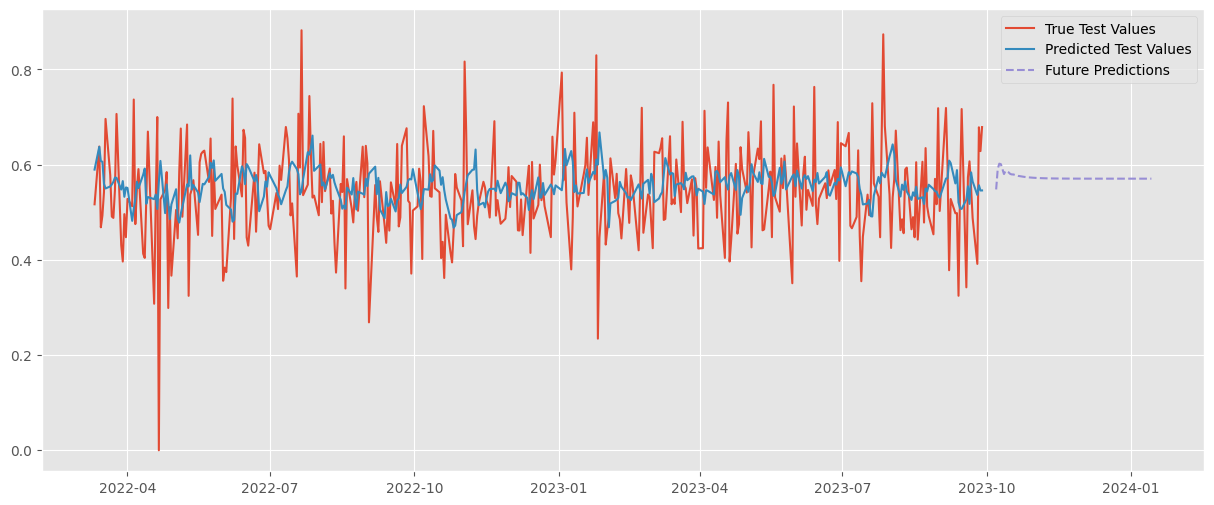

In [86]:


# --- DATA PREPROCESSING ---)

# Scaling the data to fit between 0 and 1. This helps in improving the training efficiency of neural networks.
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(main_data_diff_df['Adj Close'].values.reshape(-1, 1))

def transform_series(series, window_size):
    """Transforms the series data into sequences of length 'window_size' to predict the next value."""
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

window_size = 5
X, y = transform_series(scaled_data, window_size)

# Splitting data into train and test sets. 80% of the data is used for training and the rest for testing.
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- RNN MODEL DEFINITION AND TRAINING ---

# Defining a simple RNN model with dropout for regularization.
model_rnn = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(window_size, 1), return_sequences=True),
    tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting.
    tf.keras.layers.SimpleRNN(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Implementing early stopping. This stops training once the validation loss stops decreasing, preventing overfitting.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Implementing ReduceLROnPlateau to reduce learning rate when validation loss plateaus
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr])


# --- PREDICTION AND RESCALING ---

# Predicting values for the test set.
y_pred = model_rnn.predict(X_test)

# Rescaling the predicted and actual values back to their original range.
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# --- PREDICT FUTURE VALUES ---

# Predicting values for a future period using the trained model.
future_predictions = []
current_batch = scaled_data[-window_size:].reshape((1, window_size, 1))
number_of_future_predictions = 100

for i in range(number_of_future_predictions):
    current_prediction = model_rnn.predict(current_batch)[0]
    future_predictions.append(current_prediction)
    current_batch = np.append(current_batch[:,1:,:], [[current_prediction]], axis=1)

future_predictions_rescaled = scaler.inverse_transform(future_predictions)

# Generate future dates for plotting.
last_date = main_data.index[-1]
future_dates = pd.date_range(last_date, periods=number_of_future_predictions+1, closed='right')

# --- PLOTTING RESULTS WITH DATES ON X-AXIS ---

# Plot the actual, predicted, and future values.
test_dates = main_data.index[train_size:train_size + len(X_test)]

plt.figure(figsize=(15,6))
plt.plot(test_dates, y_test_rescaled, label='True Test Values')
plt.plot(test_dates, y_pred_rescaled, label='Predicted Test Values')
plt.plot(future_dates, future_predictions_rescaled, label='Future Predictions', linestyle='--')
plt.legend()
plt.show()

##### **i. RNN Metrics**

In [87]:
# Calculate Mean Squared Error (MSE)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate r2- Score
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

z = pd.DataFrame(np.abs((y_test_rescaled - y_pred_rescaled)/y_test_rescaled)).replace(np.inf, np.nan)
MAPE = z.mean() * 100

print('Mean Absolute Error', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Percentage Error:', MAPE)
print('R-squared (R2) Score for Test Set Forecast:', r2)

Mean Absolute Error 0.0834393800185553
Mean Squared Error (MSE): 0.011617036949527945
Root Mean Squared Error (RMSE): 0.10778235917592426
Mean Absolute Percentage Error: 0    16.364524
dtype: float64
R-squared (R2) Score for Test Set Forecast: -0.1403017016693131


### **4. LSTM**

#### **a. LSTM with Original Features**

In [88]:
new_main_data = main_data_diff_df[['Open','High', 'Low', 'Close', 'Adj Close','Volume']]
new_main_data.head()

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2016-01-04,0.431953,0.424719,0.503978,0.543504,0.543504,0.176738
2016-01-05,0.427464,0.405198,0.531202,0.536907,0.536907,0.454484
2016-01-06,0.510061,0.487057,0.482942,0.503381,0.503381,0.655777
2016-01-07,0.468688,0.401680,0.498920,0.499775,0.499775,0.390733
2016-01-08,0.390251,0.386736,0.456337,0.514937,0.514937,0.425651


In [89]:
look_back = 20
def processData(data, look_back):
    X,y = [],[]
    for i in range(look_back,len(data)):
        #X will contain 5 features from day i-N to day i-1
        #y will be closing price on day i
        X.append(data[i-look_back:i].values)
        y.append(data.iat[i,0])
        #Feature scaling
    X= np.array(X)
    y=np.array(y)
    scl = MinMaxScaler()

    y = scl.fit_transform(y.reshape(-1,1))
    for i in range(X.shape[2]):
        X[:,:,i] = scl.fit_transform(X[:,:,i])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = False)
    return X_train,X_test,y_train,y_test

Now we create a function called processData() which preprocess time series data which we will use in our LSTM neural network. This function takes two arguments: the input data and the number of time steps to look back. After that the function returns four arrays: the training and testing input data (X_train and X_test) and training and testing output data (y_train and y_test).

In [90]:
def get_accuracy(y_pred,y_test):
    #Constructing predicted movement
    movement_pred = pd.DataFrame(y_pred) - pd.DataFrame(y_pred).shift()
    movement_pred.dropna(inplace = True)
    for i in range(len(movement_pred)):
        if movement_pred.iat[i,0] > 0:
            movement_pred.iat[i,0] = 1
        else:
            movement_pred.iat[i,0] = 0
    #Constructing groundtruth movement
    movement_gt = pd.DataFrame(y_test) - pd.DataFrame(y_test).shift()
    movement_gt.dropna(inplace = True)
    for i in range(len(movement_gt)):
        if movement_gt.iat[i,0] > 0:
            movement_gt.iat[i,0] = 1
        else:
            movement_gt.iat[i,0] = 0
    #Make a comparison then calculate accuracy
    movement = (movement_pred==movement_gt)
    accuracy = np.unique(movement, return_counts=True)[1][1] / len(movement)

    #Calculating RMSE and MAPE
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    z = pd.DataFrame(np.abs((y_test - y_pred)/y_test)).replace(np.inf, np.nan)
    MAPE = z.mean() * 100

    MAE = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_pred, y_test)
    RMSE = math.sqrt(mean_squared_error(y_pred,y_test))
    r2 = r2_score(y_test, y_pred)
    return accuracy, MAPE, mae, mse, RMSE, r2

Now we create a function called get_accuracy(), this calculates the accuracy, MAPE, RSME of our LSTM neural network model. This function takes in two arguments: the predicted output data (y_pred) and the actual output data (y_test), this will return us three values: the accuracy, MAPE and RMSE.

In [91]:
weight_decay = 1e-3
from keras.regularizers import l2
from keras import regularizers, initializers, optimizers

Weight decay is a regularization technique which is used to prevent overfitting of machine learning models. The keras.regularizers module provide various regularisation techniques such as L1 and L2 regularisation, the keras.initializers module provides various initialisation techniques for weights and biases of the model, and the keras.

##### **i. Constructing LSTM Network**

In [92]:
input_layer = Input(shape=(look_back, 6))
x = LSTM(128,return_sequences=True,kernel_regularizer=l2(weight_decay),kernel_initializer=initializers.he_normal(seed=0))(input_layer)
x = Dropout(0.5)(x)
x = LSTM(32,return_sequences = False,kernel_regularizer=l2(weight_decay),kernel_initializer=initializers.he_normal(seed=0))(x)
x = Dropout(0.5)(x)
x = Dense(16,activation='relu')(x)
output_layer = Dense(1,activation='linear')(x)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='rmsprop', loss='mean_squared_error')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 6)]           0         
                                                                 
 lstm (LSTM)                 (None, 20, 128)           69120     
                                                                 
 dropout_1 (Dropout)         (None, 20, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17    

Here we define our neural network architecture of our model using the keras library. First we define the input layer of our model. We use the input() function of keras library. The shape of our input layers is set to (look_back, 5) which means that the model will take in a sequences of 5 features or columns for each time step.

The dense layer is used to add nonlinearity to the model and improve its performance. We compile the model using compile() function.

##### **ii. Employing Reduce Learning Rate Strategy**

We will employ a reduce learning rate strategy for training our LSTM neural network. First we need to import ReduceLROnPlateau() function from keras library. This will be used to reduce the learning rate of the optimizer when the validation loss of the model stops improving. In this code the monitor parameter is set to val_loss, this means that the validation loss of the model will be monitored. The factor parameter is set to 0.1, this means that the learning rate will be reduced by a factor of 0.1 when the validation loss stops improving.

In [93]:
#Employing reduce learning rate strategy
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=0, min_lr=1e-5)


The min_lr parameter is set to 1e-5, which is the minimum learning rate that the optimizer can reach.

##### **iii. Pre-processing the Time Series**

We will preprocess time series data for use in our LSTM neural network.

In [94]:
X_train,X_test,y_train,y_test = processData(new_main_data,look_back)

In [95]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1546, 20, 6)
(1546, 1)
(387, 20, 6)
(387, 1)


##### **iv. Train the LSTM Model**

- We train our LSTM network using the fit() function from the keras library.
- This takes in the training input data which is `X_train` and output data which is `y_train` and sets the batch size, number of epochs, validation split, and callbacks for the model.
- The batch_size parameter is set to 16, epoch to 30, and validation_split to 0.3.

In [96]:
model.fit(X_train,y_train,batch_size = 16,epochs = 30,validation_split=0.3,callbacks=[reduce_lr] )

Epoch 1/30
68/68 [==============================] - 7s 52ms/step - loss: 1.2050 - val_loss: 1.0652 - lr: 0.0010
Epoch 2/30
68/68 [==============================] - 2s 36ms/step - loss: 0.9593 - val_loss: 0.8537 - lr: 0.0010
Epoch 3/30
68/68 [==============================] - 2s 30ms/step - loss: 0.7588 - val_loss: 0.6820 - lr: 0.0010
Epoch 4/30
68/68 [==============================] - 2s 28ms/step - loss: 0.5943 - val_loss: 0.5370 - lr: 0.0010
Epoch 5/30
68/68 [==============================] - 2s 28ms/step - loss: 0.4633 - val_loss: 0.4125 - lr: 0.0010
Epoch 6/30
68/68 [==============================] - 2s 27ms/step - loss: 0.3580 - val_loss: 0.3211 - lr: 0.0010
Epoch 7/30
68/68 [==============================] - 3s 38ms/step - loss: 0.2743 - val_loss: 0.2459 - lr: 0.0010
Epoch 8/30
68/68 [==============================] - 2s 33ms/step - loss: 0.2079 - val_loss: 0.1866 - lr: 0.0010
Epoch 9/30
68/68 [==============================] - 2s 27ms/step - loss: 0.1555 - val_loss: 0.1405 - lr:

##### **v. Predict on Test Data**

- In our case the predicted output data is the adjusted closing price of the stock on the next day, which is what out neural network was trained to predict.

In [97]:
y_pred = model.predict(X_test)

13/13 [==============================] - 1s 12ms/step


##### **vi. LSTM Metrics (Using Original Features)**

In [98]:
# Calling the function
accuracy, MAPE, mae, mse, RMSE, r2 = get_accuracy(y_pred,y_test)

# Printing the metrics
print('Accuracy:', accuracy)
print('MAPE:', MAPE)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', RMSE)
print('r2:', r2)

Accuracy: 0.4585492227979275
MAPE: 0    23.193215
dtype: float64
MAE: 0.0834393800185553
MSE: 0.013305269395492746
RMSE: 0.1153484694111402
r2: -0.003520473842448135


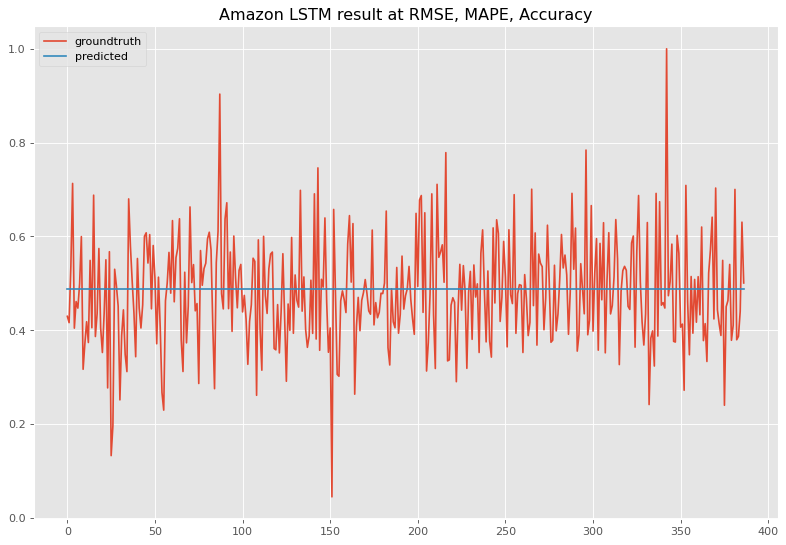

In [99]:
plt.figure(figsize=(12, 8), dpi=80)
plt.title('Amazon LSTM result at RMSE, MAPE, Accuracy')
plt.plot(y_test,label = 'groundtruth')
plt.plot(y_pred,label='predicted')
plt.legend();

#### **b. LSTM with Important Features from XGBoost**
The top 8 columns identified are:
- Close
- High
- Returns
- Rolling_Std
- Volume
- Open
- ROC
- RSI

In [100]:
# new df for the model
new_main_data_2 = main_data_diff_df[['Close', 'High', 'Returns', 'Rolling_Std', 'Volume', 'Open', 'ROC', 'RSI']]
new_main_data_2.head()

,Close,High,Returns,Rolling_Std,Volume,Open,ROC,RSI
date,,,,,,,,
2016-01-04,0.543504,0.424719,0.500956,0.581436,0.176738,0.431953,0.411904,0.426493
2016-01-05,0.536907,0.405198,0.527626,0.512660,0.454484,0.427464,0.473835,0.449317
2016-01-06,0.503381,0.487057,0.545968,0.518774,0.655777,0.510061,0.551887,0.456892
2016-01-07,0.499775,0.401680,0.525588,0.510277,0.390733,0.468688,0.442362,0.379432
2016-01-08,0.514937,0.386736,0.512804,0.494565,0.425651,0.390251,0.342704,0.365815


##### **i. Constructing LSTM Network**

In [101]:
input_layer = Input(shape=(look_back, 8))
x = LSTM(128,return_sequences=True,kernel_regularizer=l2(weight_decay),kernel_initializer=initializers.he_normal(seed=0))(input_layer)
x = Dropout(0.5)(x)
x = LSTM(32,return_sequences = False,kernel_regularizer=l2(weight_decay),kernel_initializer=initializers.he_normal(seed=0))(x)
x = Dropout(0.5)(x)
x = Dense(16,activation='relu')(x)
output_layer = Dense(1,activation='linear')(x)
model2 = Model(inputs=input_layer, outputs=output_layer)
model2.compile(optimizer='rmsprop', loss='mean_squared_error')
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 8)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 20, 128)           70144     
                                                                 
 dropout_3 (Dropout)         (None, 20, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17  

##### **ii. Pre-processing the Time Series and Train LSTM Model on Important Features**

In [102]:
X_train_2, X_test_2, y_train_2, y_test_2 = processData(new_main_data_2, look_back)

In [103]:
print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)

(1546, 20, 8)
(1546, 1)
(387, 20, 8)
(387, 1)


In [104]:
model2.fit(X_train_2, y_train_2, batch_size = 16,epochs = 30, validation_split=0.3, callbacks=[reduce_lr] )

Epoch 1/30
68/68 [==============================] - 7s 55ms/step - loss: 1.2136 - val_loss: 1.0689 - lr: 0.0010
Epoch 2/30
68/68 [==============================] - 2s 32ms/step - loss: 0.9455 - val_loss: 0.8284 - lr: 0.0010
Epoch 3/30
68/68 [==============================] - 2s 28ms/step - loss: 0.7281 - val_loss: 0.6341 - lr: 0.0010
Epoch 4/30
68/68 [==============================] - 2s 26ms/step - loss: 0.5545 - val_loss: 0.4950 - lr: 0.0010
Epoch 5/30
68/68 [==============================] - 2s 29ms/step - loss: 0.4165 - val_loss: 0.3674 - lr: 0.0010
Epoch 6/30
68/68 [==============================] - 2s 27ms/step - loss: 0.3101 - val_loss: 0.2812 - lr: 0.0010
Epoch 7/30
68/68 [==============================] - 3s 39ms/step - loss: 0.2271 - val_loss: 0.2127 - lr: 0.0010
Epoch 8/30
68/68 [==============================] - 3s 39ms/step - loss: 0.1637 - val_loss: 0.1480 - lr: 0.0010
Epoch 9/30
68/68 [==============================] - 2s 27ms/step - loss: 0.1157 - val_loss: 0.1099 - lr:

##### **iii. Predict on Test Data**

In [105]:
y_pred_2 = model2.predict(X_test_2)

13/13 [==============================] - 1s 12ms/step


##### **iv. LSTM Metrics (Using Important Features)**

In [106]:
# Calling the function
accuracy, MAPE, mae, mse, RMSE, r2 = get_accuracy(y_pred_2,y_test_2)

# Printing the metrics
print('Accuracy:', accuracy)
print('MAPE:', MAPE)
print('MAE', mae)
print('MSE', mse)
print('RMSE:', RMSE)
print('r2:', r2)

Accuracy: 0.4844559585492228
MAPE: 0    14.478077
dtype: float64
MAE 0.0834393800185553
MSE 0.01101705394518033
RMSE: 0.10496215482344258
r2: -0.0772308163614357


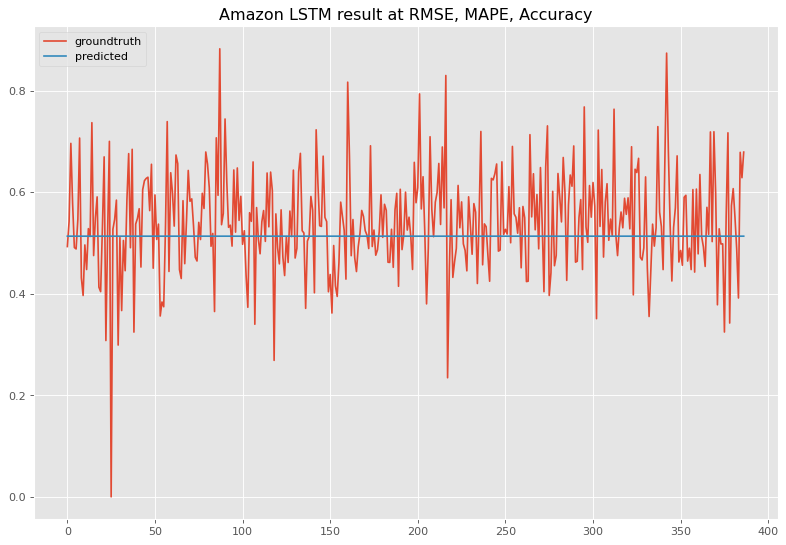

In [107]:
plt.figure(figsize=(12, 8), dpi=80)
plt.title('Amazon LSTM result at RMSE, MAPE, Accuracy')
plt.plot(y_test_2,label = 'groundtruth')
plt.plot(y_pred_2,label='predicted')
plt.legend();

## **E. Evaluation of Models**

In [108]:
# create the summary df and define columns
scores = pd.DataFrame(np.array([
        ['SARIMA', 0.0517, 0.0048, 0.0694, 9.7625],
        ['FB Prophet', 7.6182, 118.5376, 10.8874, 7.7278],
        ['Simple RNN', 0.0773, 0.0105, 0.1023, 14.8479],
        ['LSTM-Original Features', 0.0773, 0.0133, 0.1155, 23.3351],
        ['LSTM-Important Features', 0.0773, 0.0102, 0.1011, 14.8452]
]))
scores.columns = ['Model', 'MAE', 'MSE', 'RMSE', 'MAPE']
scores # scaled DataFrame (main_data_diff_df)

,Model,MAE,MSE,RMSE,MAPE
0,SARIMA,0.0517,0.0048,0.0694,9.7625
1,FB Prophet,7.6182,118.5376,10.8874,7.7278
2,Simple RNN,0.0773,0.0105,0.1023,14.8479
3,LSTM-Original Features,0.0773,0.0133,0.1155,23.3351
4,LSTM-Important Features,0.0773,0.0102,0.1011,14.8452


- **SARIMA** appears to be the best-performing model among the options listed. It has the lowest MAE, MSE, and RMSE, indicating that it provides the most accurate predictions with relatively low error rates. The MAPE is also below 10%, suggesting that, on average, its predictions are within 10% of the actual Amazon stock prices.
- **FB Prophet**, while having a low MAPE, has significantly higher errors in terms of MAE, MSE, and RMSE compared to SARIMA. This indicates that it might not be as accurate as SARIMA in predicting Amazon stock prices.
- The **Simple RNN** model performs better than FB Prophet in terms of MAE, MSE, and RMSE, but it is not as accurate as SARIMA, as it has higher error rates.
- The **LSTM with original features** model with original features has similar performance to the Simple RNN model, with slightly higher MAPE and RMSE. It is less accurate than SARIMA.
- The **LSTM model with important features** has a similar performance to the Simple RNN model, with a slightly lower RMSE. However, it still does not perform as well as SARIMA in terms of accuracy.

In summary, the SARIMA model outperforms the other models in predicting Amazon stock prices, as it has the lowest MAE, MSE, and RMSE, along with a reasonably low MAPE. The other models have higher errors and are less accurate in comparison.